In [1]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.2 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
# !pip install missingno
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv("/content/Churn-Data.csv")
df.head()

cID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  4223-BKEOR  Female              0      No        Yes      21          Yes   
1  6035-RIIOM  Female              0      No         No      54          Yes   
2  3797-VTIDR    Male              0     Yes         No       1           No   
3  2568-BRGYX    Male              0      No         No       4          Yes   
4  2775-SEFEE    Male              0      No        Yes       0          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0                No             DSL            Yes  ...              Yes   
1               Yes     Fiber optic             No  ...               No   
2  No phone service             DSL             No  ...               No   
3                No     Fiber optic             No  ...               No   
4               Yes             DSL            Yes  ...               No   

  TechSupport TV_Streaming Movie_Streaming        Contract PaperlessBilling  \
0          No           No             Yes        One year               No   
1          No          Yes             Yes        Two year              Yes   
2          No           No              No  Month-to-month              Yes   
3          No           No              No  Month-to-month              Yes   
4         Yes           No              No        Two year              Yes   

              Method_Payment Charges_Month  TotalCharges Churn  
0               Mailed check         64.85        1336.8    No  
1  Bank transfer (automatic)         97.20       5129.45    No  
2           Electronic check         23.45         23.45   Yes  
3           Electronic check         70.20        237.95   Yes  
4  Bank transfer (automatic)         61.90                  No  

[5 rows x 21 columns]

# Exploratory Data Analysis

In [4]:
def check_data(dataframe,head=5):
    print(20*"-" + "Information".center(20) + 20*"-")
    print(dataframe.info())
    print(20*"-" + "Data Shape".center(20) + 20*"-")
    print(dataframe.shape)
    print("\n" + 20*"-" + "The First 5 Data".center(20) + 20*"-")
    print(dataframe.head())
    print("\n" + 20 * "-" + "Missing Values".center(20) + 20 * "-")
    print(dataframe.isnull().sum())
    print("\n" + 40 * "-" + "Describe the Data".center(40) + 40 * "-")
    print(dataframe.describe([0.01, 0.05,0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T)

check_data(df)

--------------------    Information     --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cID               5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  TV_Streaming      5634 non-null   object 
 14  Movie_Streaming   5634 non-null   object 
 15  Contract          5634 non-n

In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for any new missing values in 'TotalCharges'
new_missing_values = df['TotalCharges'].isnull().sum()
new_missing_values

10

In [6]:
# Display the rows with missing values in 'TotalCharges'
missing_total_charges_rows = df[df['TotalCharges'].isnull()]
missing_total_charges_rows

cID  gender  SeniorCitizen Partner Dependents  tenure  \
4     2775-SEFEE    Male              0      No        Yes       0   
282   1371-DWPAZ  Female              0     Yes        Yes       0   
2419  3213-VVOLG    Male              0     Yes        Yes       0   
2734  2923-ARZLG    Male              0     Yes        Yes       0   
2903  7644-OMVMY    Male              0     Yes        Yes       0   
3974  5709-LVOEQ  Female              0     Yes        Yes       0   
5023  3115-CZMZD    Male              0      No        Yes       0   
5030  2520-SGTTA  Female              0     Yes        Yes       0   
5343  4472-LVYGI  Female              0     Yes        Yes       0   
5599  4367-NUYAO    Male              0     Yes        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
4             Yes               Yes             DSL                  Yes  ...   
282            No  No phone service             DSL                  Yes  ...   
2419          Yes               Yes              No  No internet service  ...   
2734          Yes                No              No  No internet service  ...   
2903          Yes                No              No  No internet service  ...   
3974          Yes                No             DSL                  Yes  ...   
5023          Yes                No              No  No internet service  ...   
5030          Yes                No              No  No internet service  ...   
5343           No  No phone service             DSL                  Yes  ...   
5599          Yes               Yes              No  No internet service  ...   

         DeviceProtection          TechSupport         TV_Streaming  \
4                      No                  Yes                   No   
282                   Yes                  Yes                  Yes   
2419  No internet service  No internet service  No internet service   
2734  No internet service  No internet service  No internet service   
2903  No internet service  No internet service  No internet service   
3974                  Yes                   No                  Yes   
5023  No internet service  No internet service  No internet service   
5030  No internet service  No internet service  No internet service   
5343                  Yes                  Yes                  Yes   
5599  No internet service  No internet service  No internet service   

          Movie_Streaming  Contract PaperlessBilling  \
4                      No  Two year              Yes   
282                    No  Two year               No   
2419  No internet service  Two year               No   
2734  No internet service  One year              Yes   
2903  No internet service  Two year               No   
3974                  Yes  Two year               No   
5023  No internet service  Two year               No   
5030  No internet service  Two year               No   
5343                   No  Two year              Yes   
5599  No internet service  Two year               No   

                 Method_Payment Charges_Month  TotalCharges  Churn  
4     Bank transfer (automatic)         61.90           NaN     No  
282     Credit card (automatic)         56.05           NaN     No  
2419               Mailed check         25.35           NaN     No  
2734               Mailed check         19.70           NaN     No  
2903               Mailed check         19.85           NaN     No  
3974               Mailed check         80.85           NaN     No  
5023               Mailed check         20.25           NaN     No  
5030               Mailed check         20.00           NaN     No  
5343  Bank transfer (automatic)         52.55           NaN     No  
5599               Mailed check         25.75           NaN     No  

[10 rows x 21 columns]

In [7]:
df['TotalCharges'].fillna(0, inplace=True)

In [8]:
df.isnull().sum()

cID                 0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
TV_Streaming        0
Movie_Streaming     0
Contract            0
PaperlessBilling    0
Method_Payment      0
Charges_Month       0
TotalCharges        0
Churn               0
dtype: int64

Since CustomerID is likely a unique identifier for each customer and may not contribute to aggregate data analysis, we could either keep it for identification purposes or remove it if it's not needed for the analysis.

In [9]:
df.drop('cID', axis=1, inplace=True)

# Display the first few rows of the dataset to confirm the drop
df.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0      No        Yes      21          Yes   
1  Female              0      No         No      54          Yes   
2    Male              0     Yes         No       1           No   
3    Male              0      No         No       4          Yes   
4    Male              0      No        Yes       0          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0                No             DSL            Yes           No   
1               Yes     Fiber optic             No          Yes   
2  No phone service             DSL             No           No   
3                No     Fiber optic             No           No   
4               Yes             DSL            Yes          Yes   

  DeviceProtection TechSupport TV_Streaming Movie_Streaming        Contract  \
0              Yes          No           No             Yes        One year   
1               No          No          Yes             Yes        Two year   
2               No          No           No              No  Month-to-month   
3               No          No           No              No  Month-to-month   
4               No         Yes           No              No        Two year   

  PaperlessBilling             Method_Payment  Charges_Month  TotalCharges  \
0               No               Mailed check          64.85       1336.80   
1              Yes  Bank transfer (automatic)          97.20       5129.45   
2              Yes           Electronic check          23.45         23.45   
3              Yes           Electronic check          70.20        237.95   
4              Yes  Bank transfer (automatic)          61.90          0.00   

  Churn  
0    No  
1    No  
2   Yes  
3   Yes  
4    No

# Summary Statistics

In [10]:
def grab_col_names(dataframe, cat_th=10, car_th=20):

   # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 5634
Variables: 20
cat_cols: 17
num_cols: 3
cat_but_car: 0
num_but_cat: 1


# numeric variable

In [11]:
num_cols

['tenure', 'Charges_Month', 'TotalCharges']

In [12]:
df[num_cols].describe().T

count         mean          std    min      25%       50%  \
tenure         5634.0    32.373092    24.424539   0.00    9.000    29.000   
Charges_Month  5634.0    64.864253    30.089324  18.25   35.750    70.525   
TotalCharges   5634.0  2287.087948  2263.197899   0.00  406.275  1405.650   

                     75%     max  
tenure           55.0000    72.0  
Charges_Month    89.9375   118.6  
TotalCharges   3806.6125  8684.8

Tenure: The average tenure is approximately 32 months and spans a wide range from 0 to 72 months, indicating a mix of both new and long-term customers.

Monthly Charges: The average monthly charge is approximately 64.76, with charges ranging from 18.25 to 118.75 USD.

Total Charges: Total charges exhibit significant variation, with an average around 2,279.73 USD. The distribution is skewed, and the maximum charge is 8,684.80 USD.

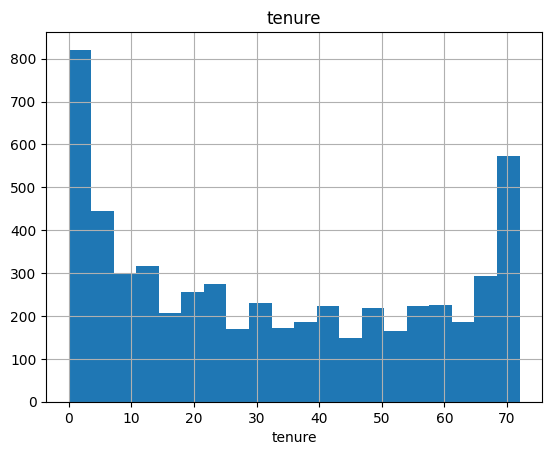

count    5634.000000
mean       32.373092
std        24.424539
min         0.000000
10%         2.000000
20%         6.000000
40%        20.000000
50%        29.000000
60%        40.000000
80%        60.000000
90%        69.000000
95%        72.000000
99%        72.000000
max        72.000000
Name: tenure, dtype: float64


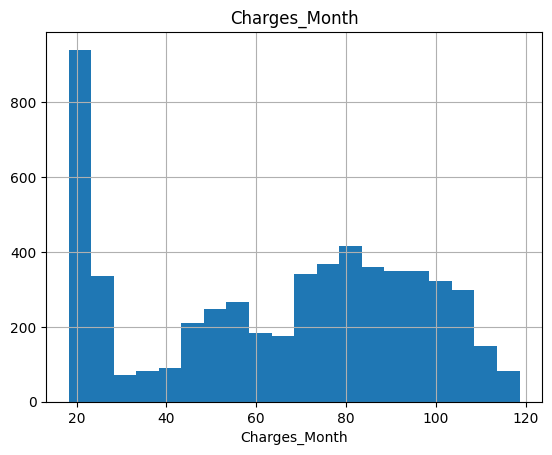

count    5634.000000
mean       64.864253
std        30.089324
min        18.250000
10%        20.065000
20%        25.100000
40%        58.660000
50%        70.525000
60%        79.290000
80%        94.350000
90%       102.600000
95%       107.017500
99%       114.733500
max       118.600000
Name: Charges_Month, dtype: float64


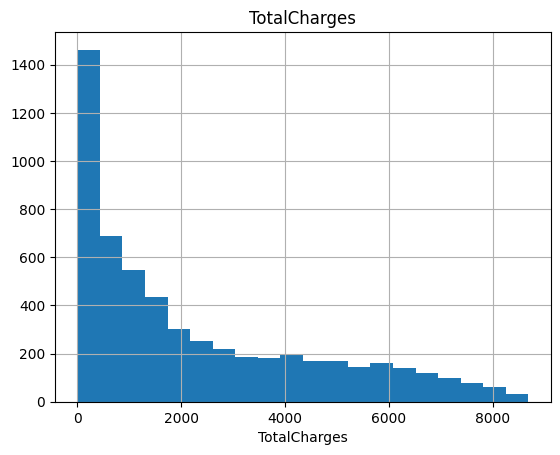

count    5634.000000
mean     2287.087948
std      2263.197899
min         0.000000
10%        84.530000
20%       272.710000
40%       946.020000
50%      1405.650000
60%      2078.430000
80%      4474.430000
90%      5980.295000
95%      6889.870000
99%      8013.286000
max      8684.800000
Name: TotalCharges, dtype: float64


In [13]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.10, 0.20, 0.40, 0.50, 0.60, 0.80, 0.90, 0.95, 0.99]

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)
        print(dataframe[numerical_col].describe(quantiles).T)


for col in num_cols:
    num_summary(df, col, plot=True)



Tenure : The distribution exhibits two peaks, indicating a significant number of new customers (with shorter tenure) and a significant number of long-term customers (with higher tenure). This bimodal distribution suggests two primary customer groups in terms of their durations with the company.

Monthly Charges: The distribution is somewhat bimodal; one peak is at the lower end (around 20 USD) and the other at the higher end (around 80-90 USD). This indicates different customer groups opting for services based on their subscription choices; some prefer basic, lower-cost services while others prefer more expensive packages.

Total Charges: The distribution is right-skewed, indicating that a large number of customers have relatively lower total charges, which aligns with a significant number of customers having shorter tenures.

These observations highlight the diversity in customer behaviors and preferences within the dataset, reflecting varying levels of engagement and service selection among different segments of customers.

# **categorical variables**

In [14]:
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'TV_Streaming',
 'Movie_Streaming',
 'Contract',
 'PaperlessBilling',
 'Method_Payment',
 'Churn',
 'SeniorCitizen']

In [15]:
df[cat_cols].describe(include=["object"])

gender Partner Dependents PhoneService MultipleLines InternetService  \
count    5634    5634       5634         5634          5634            5634   
unique      2       2          2            2             3               3   
top      Male      No         No          Yes            No     Fiber optic   
freq     2887    2904       3951         5082          2685            2481   

       OnlineSecurity OnlineBackup DeviceProtection TechSupport TV_Streaming  \
count            5634         5634             5634        5634         5634   
unique              3            3                3           3            3   
top                No           No               No          No           No   
freq             2810         2448             2489        2791         2239   

       Movie_Streaming        Contract PaperlessBilling    Method_Payment  \
count             5634            5634             5634              5634   
unique               3               3                2                 4   
top                 No  Month-to-month              Yes  Electronic check   
freq              2223            3083             3325              1887   

       Churn  
count   5634  
unique     2  
top       No  
freq    4138

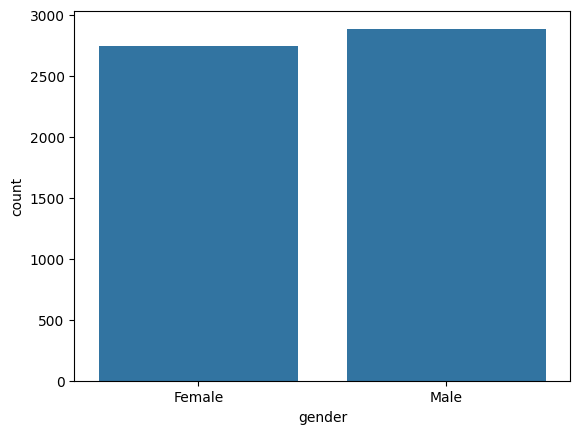

        gender      Ratio
gender                   
Male      2887  51.242457
Female    2747  48.757543
##########################################


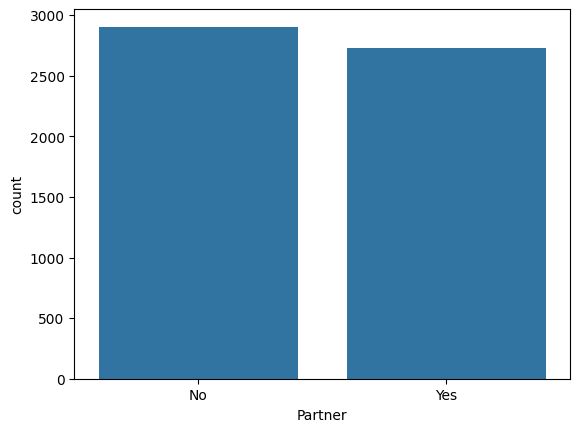

         Partner      Ratio
Partner                    
No          2904  51.544196
Yes         2730  48.455804
##########################################


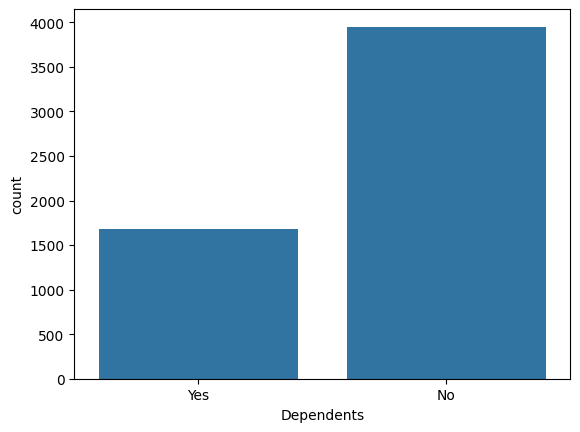

            Dependents      Ratio
Dependents                       
No                3951  70.127796
Yes               1683  29.872204
##########################################


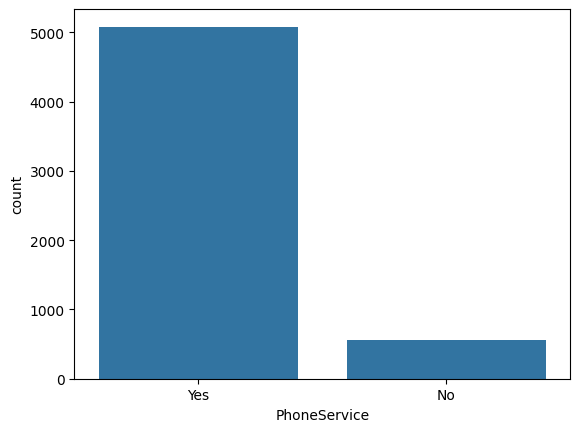

              PhoneService      Ratio
PhoneService                         
Yes                   5082  90.202343
No                     552   9.797657
##########################################


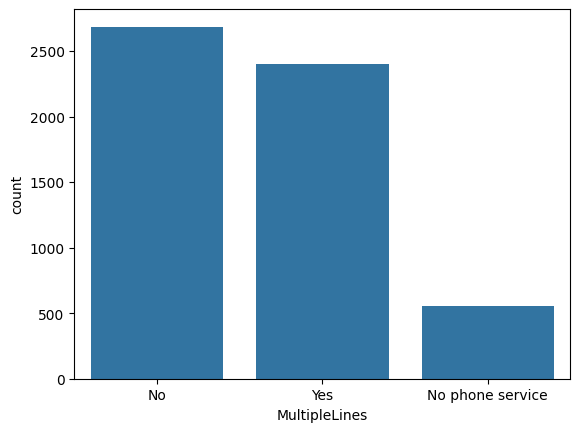

                  MultipleLines      Ratio
MultipleLines                             
No                         2685  47.657082
Yes                        2397  42.545261
No phone service            552   9.797657
##########################################


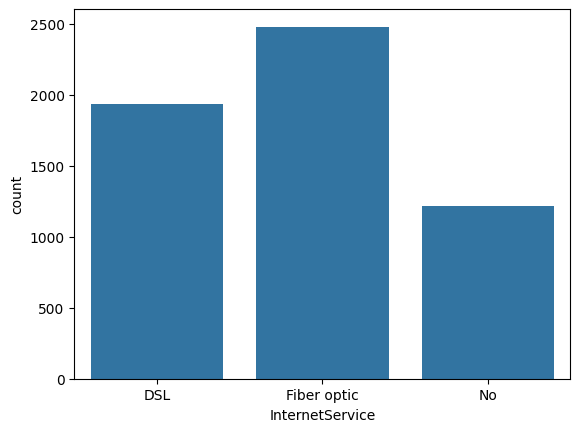

                 InternetService      Ratio
InternetService                            
Fiber optic                 2481  44.036209
DSL                         1939  34.416045
No                          1214  21.547746
##########################################


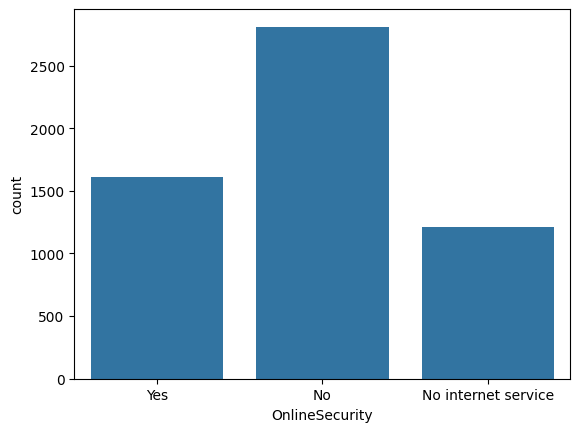

                     OnlineSecurity      Ratio
OnlineSecurity                                
No                             2810  49.875754
Yes                            1610  28.576500
No internet service            1214  21.547746
##########################################


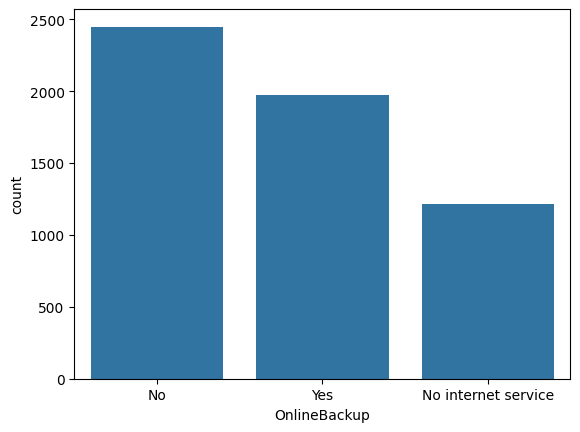

                     OnlineBackup      Ratio
OnlineBackup                                
No                           2448  43.450479
Yes                          1972  35.001775
No internet service          1214  21.547746
##########################################


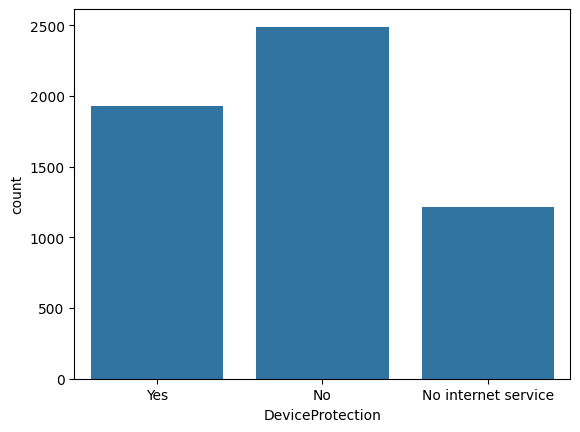

                     DeviceProtection      Ratio
DeviceProtection                                
No                               2489  44.178204
Yes                              1931  34.274050
No internet service              1214  21.547746
##########################################


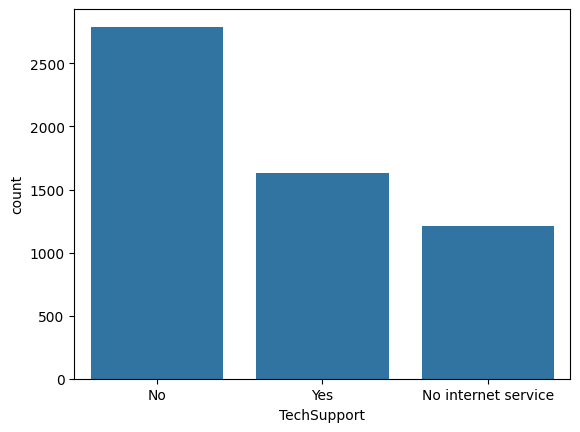

                     TechSupport      Ratio
TechSupport                                
No                          2791  49.538516
Yes                         1629  28.913738
No internet service         1214  21.547746
##########################################


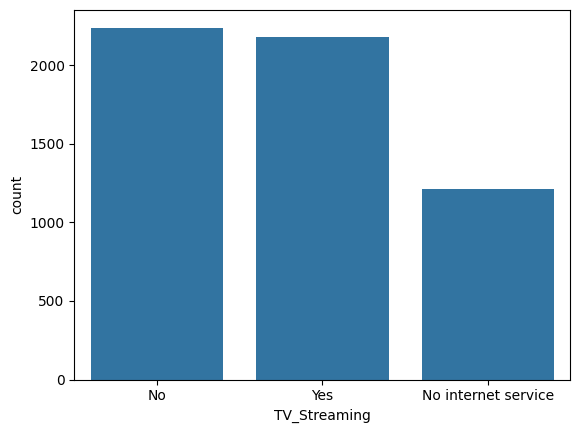

                     TV_Streaming      Ratio
TV_Streaming                                
No                           2239  39.740859
Yes                          2181  38.711395
No internet service          1214  21.547746
##########################################


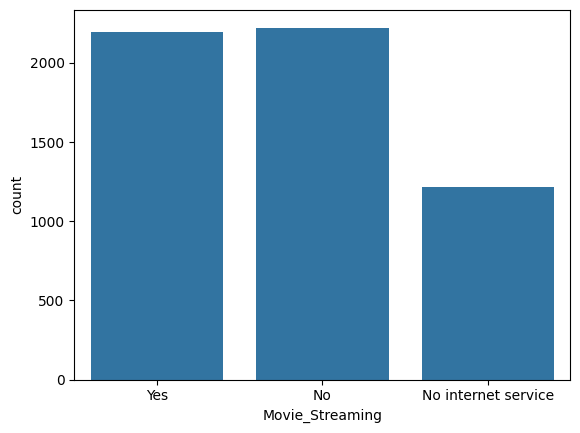

                     Movie_Streaming      Ratio
Movie_Streaming                                
No                              2223  39.456869
Yes                             2197  38.995385
No internet service             1214  21.547746
##########################################


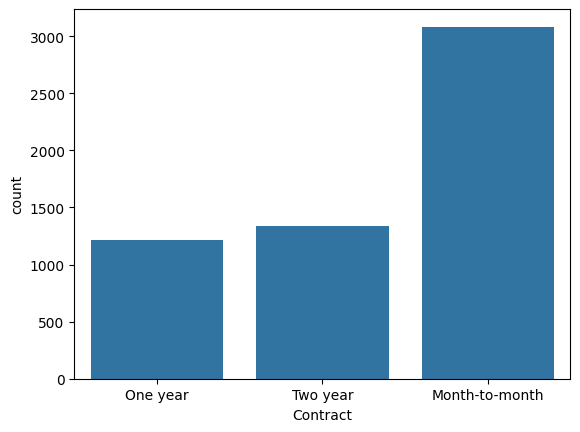

                Contract      Ratio
Contract                           
Month-to-month      3083  54.721335
Two year            1339  23.766418
One year            1212  21.512247
##########################################


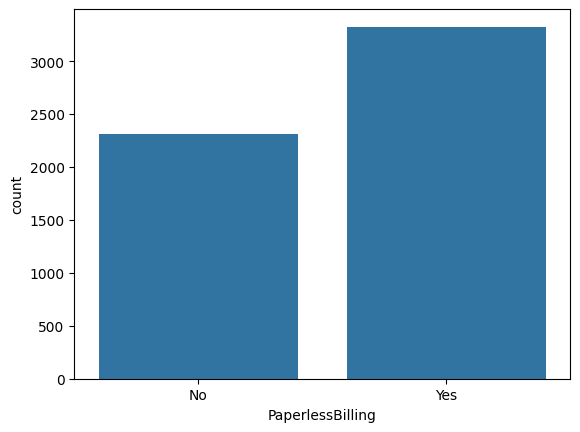

                  PaperlessBilling      Ratio
PaperlessBilling                             
Yes                           3325  59.016684
No                            2309  40.983316
##########################################


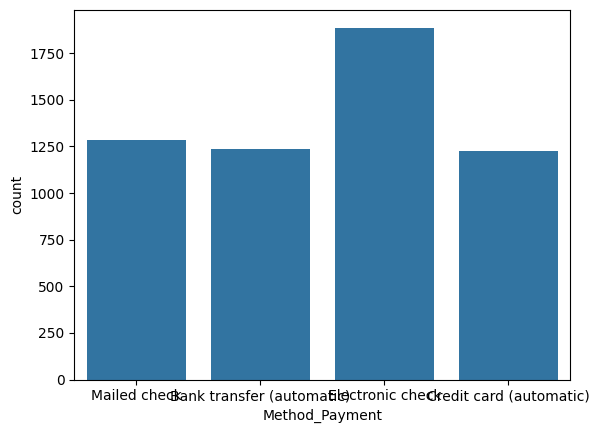

                           Method_Payment      Ratio
Method_Payment                                      
Electronic check                     1887  33.493078
Mailed check                         1282  22.754704
Bank transfer (automatic)            1238  21.973731
Credit card (automatic)              1227  21.778488
##########################################


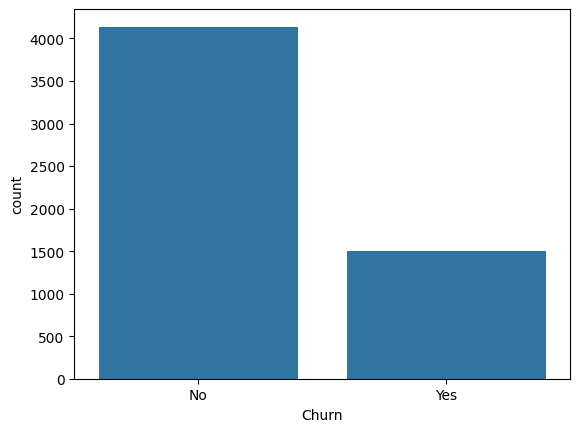

       Churn      Ratio
Churn                  
No      4138  73.446929
Yes     1496  26.553071
##########################################


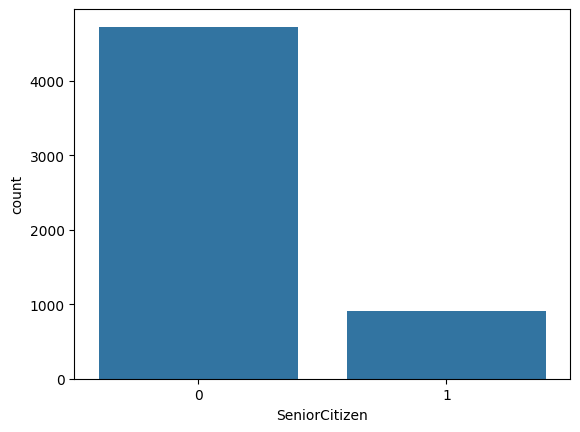

               SeniorCitizen      Ratio
SeniorCitizen                          
0                       4728  83.919063
1                        906  16.080937
##########################################


In [16]:
def cat_summary(dataframe, col_name, plot=False):

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)
        print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
        print("##########################################")


for col in cat_cols:
    cat_summary(df, col,plot=True)

#Summary
Gender : The number of male and female customers is approximately equal.

Partner and Dependents: Slightly more customers do not have a partner or dependents.

PhoneService : Most customers (about 90%) have phone service.

MultipleLines, InternetService , OnlineSecurity , OnlineBackup , DeviceProtection , TechSupport , StreamingTV , StreamingMovies : These columns have various categories, with the majority of customers not having additional services like online security or tech support.

Contract : The most common contract type is month-to-month.

PaperlessBilling : The majority of customers (about 59%) use paperless billing.

PaymentMethod: The most common payment method is electronic check.

Churn: As indicated by the frequency of 'No' in the churn column, the churn rate is lower than the retention rate.

These observations provide insights into how customers engage with various services and billing methods, as well as their contract preferences and churn behavior within the dataset.

# **Churn analysis**

In [17]:
df["Churn"].value_counts()

Churn
No     4138
Yes    1496
Name: count, dtype: int64

In [18]:
df["Churn"] = df["Churn"].map({'No':0,'Yes':1})

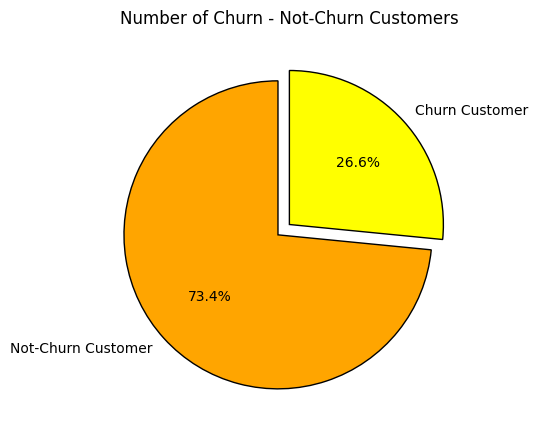

In [19]:
colors = ['orange','yellow']


l = list(df['Churn'].value_counts())
circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]

fig = plt.subplots(figsize = (20,5))
plt.pie(circle,labels = ['Not-Churn Customer','Churn Customer'],autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Churn - Not-Churn %');

plt.title('Number of Churn - Not-Churn Customers');
plt.show()


The dataset is unbalanced in a near about 3 : 1 ratio for Not-Churn : Churn customers!

Due to this, predictions will be biased towards Not-Churn customers.

Visualizations will also display this bias!

# **Categorical Variables vs Target Variable (Churn):**
Next, let's analyze the distribution of some key categorical variables, especially those that might have a significant impact on churn, like Contract, InternetService, and PaymentMethod.

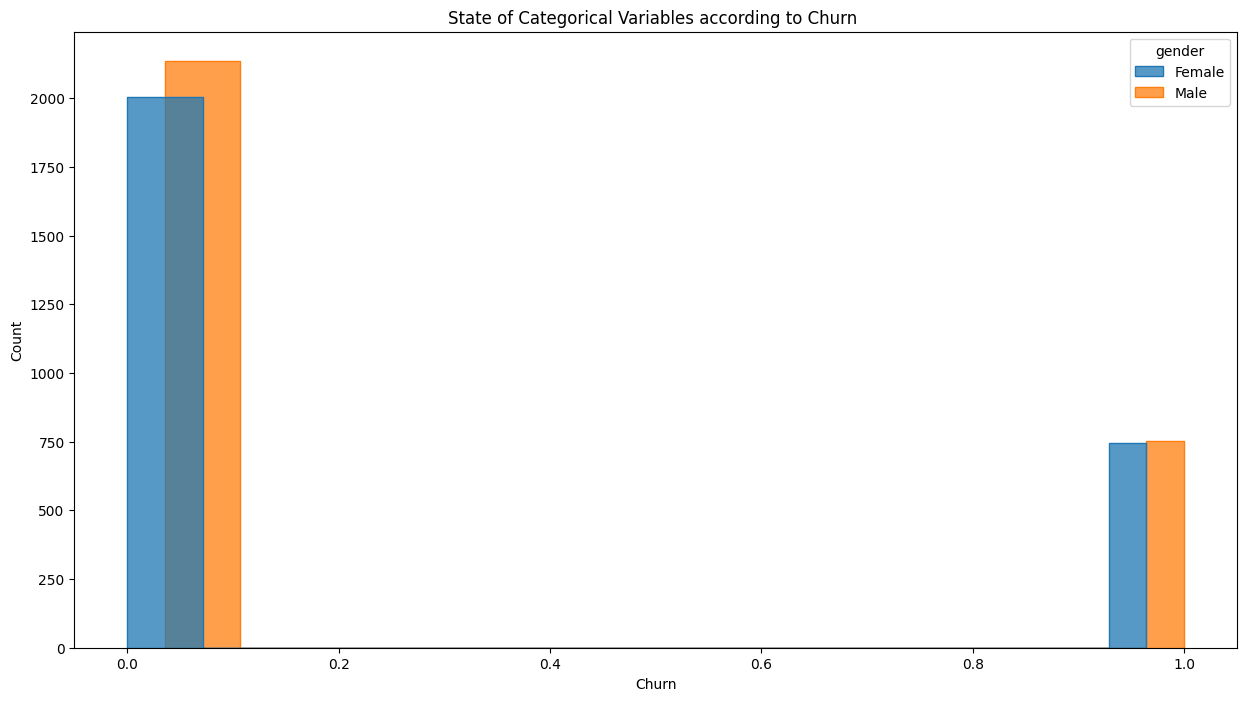

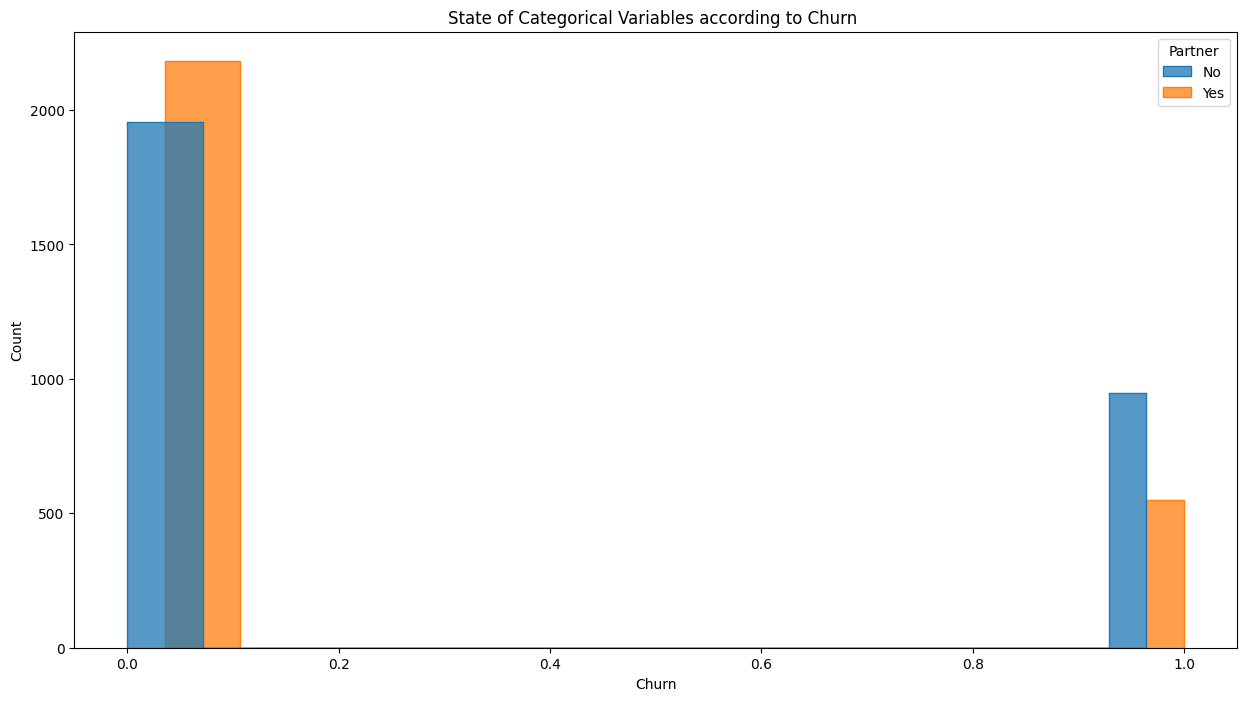

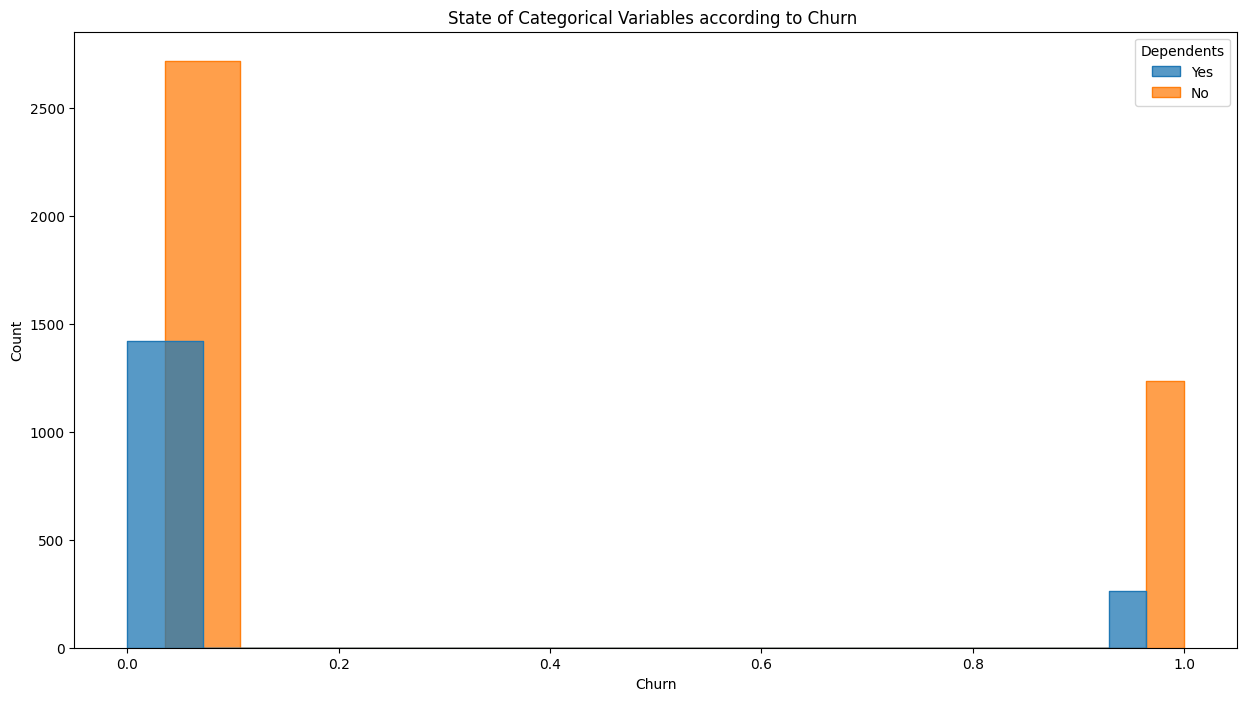

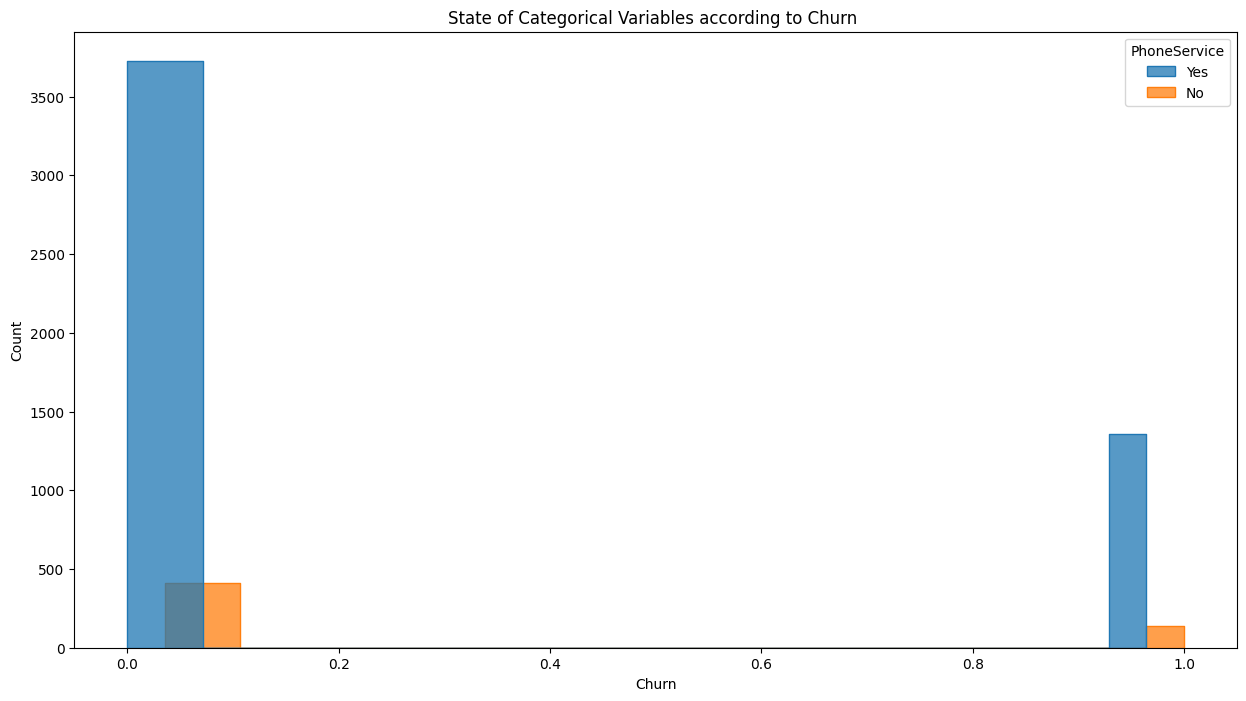

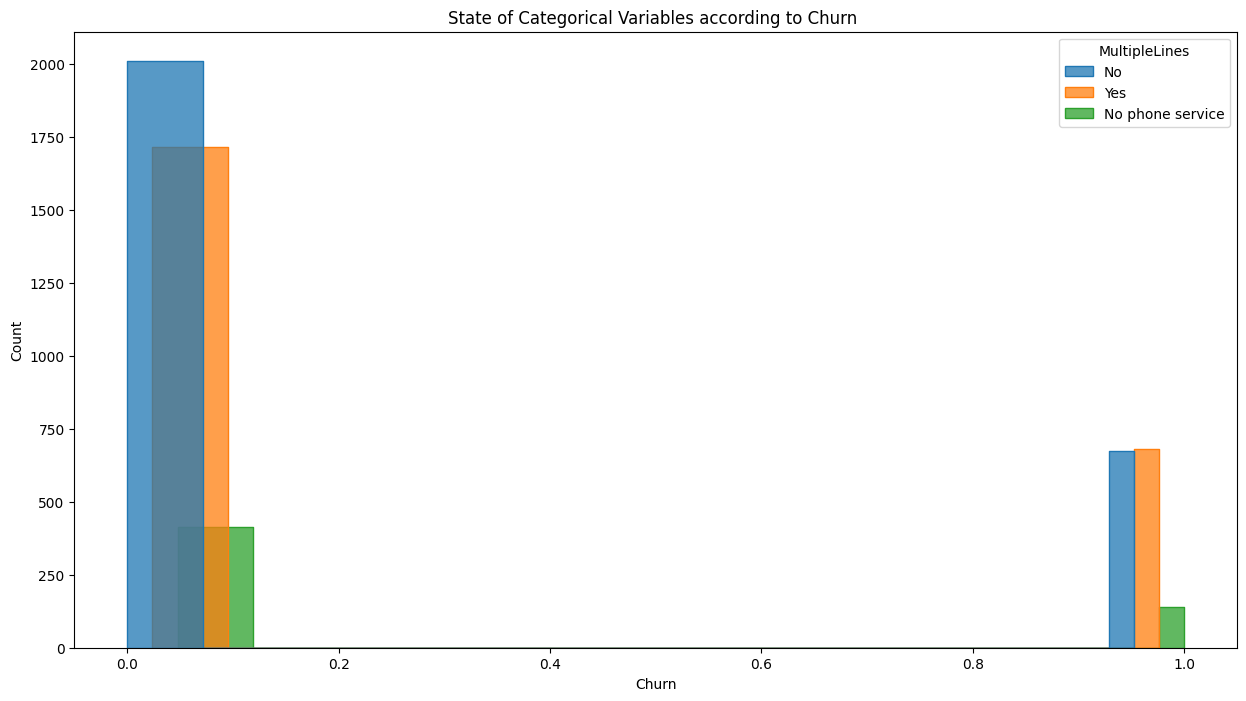

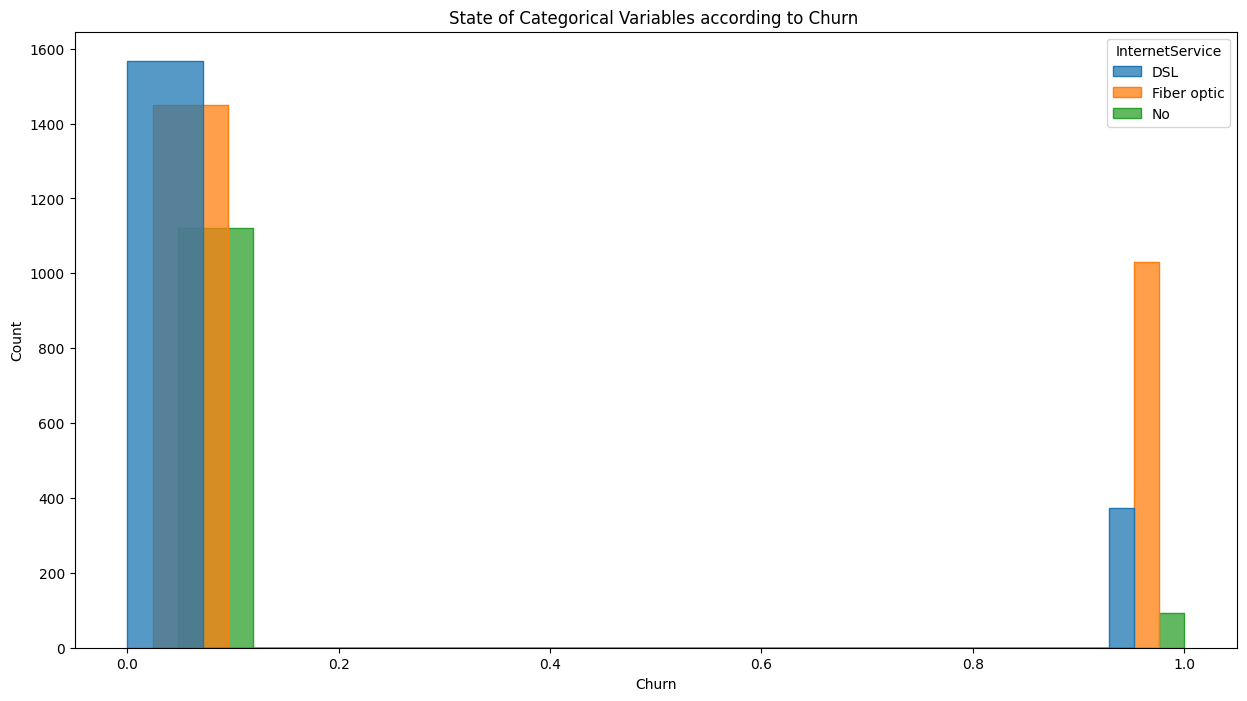

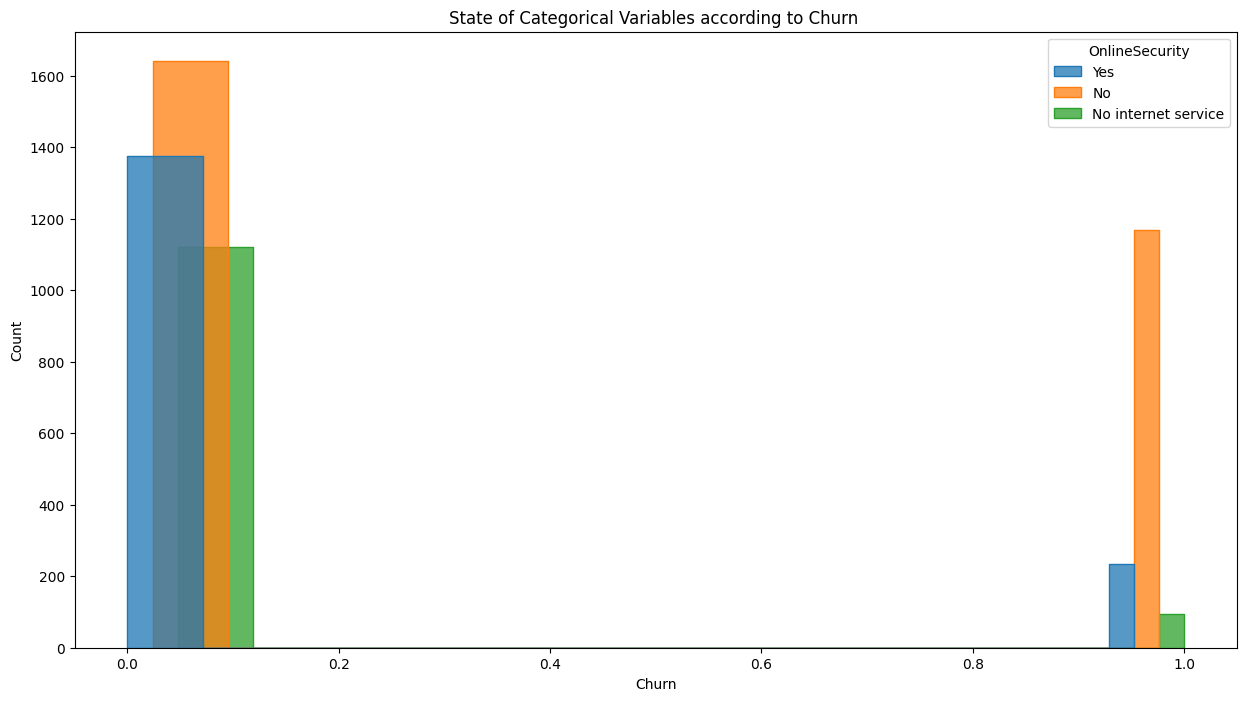

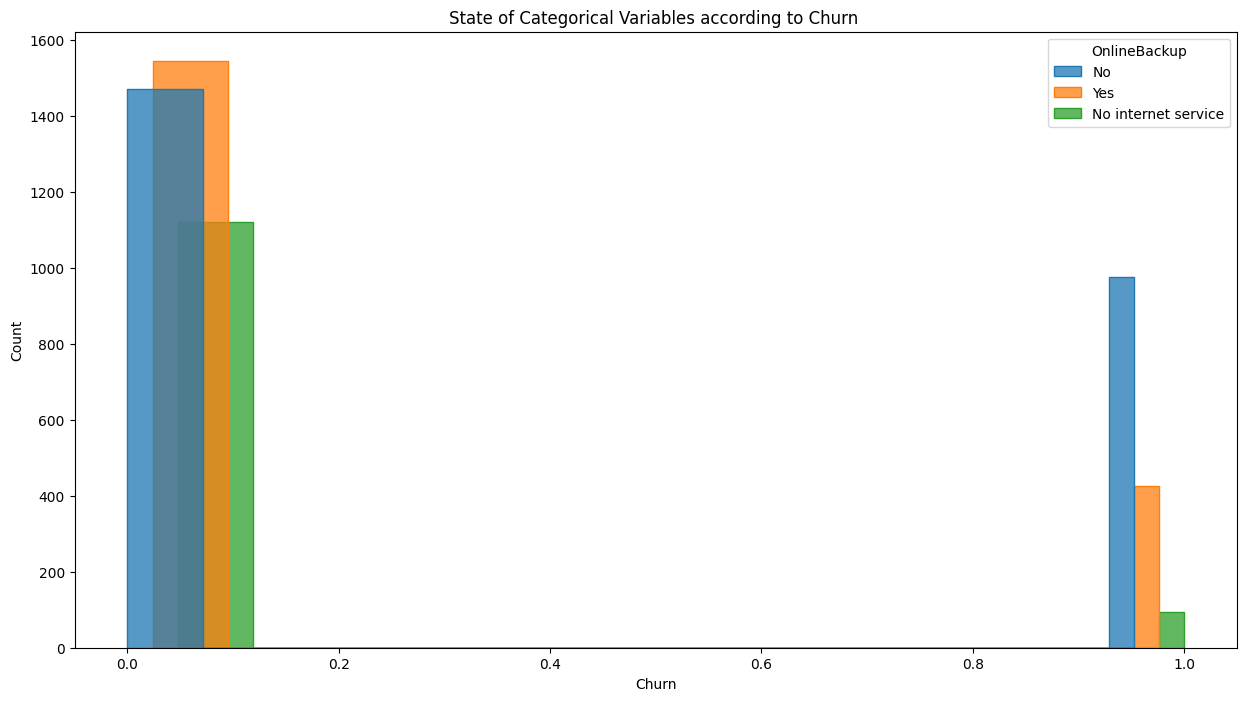

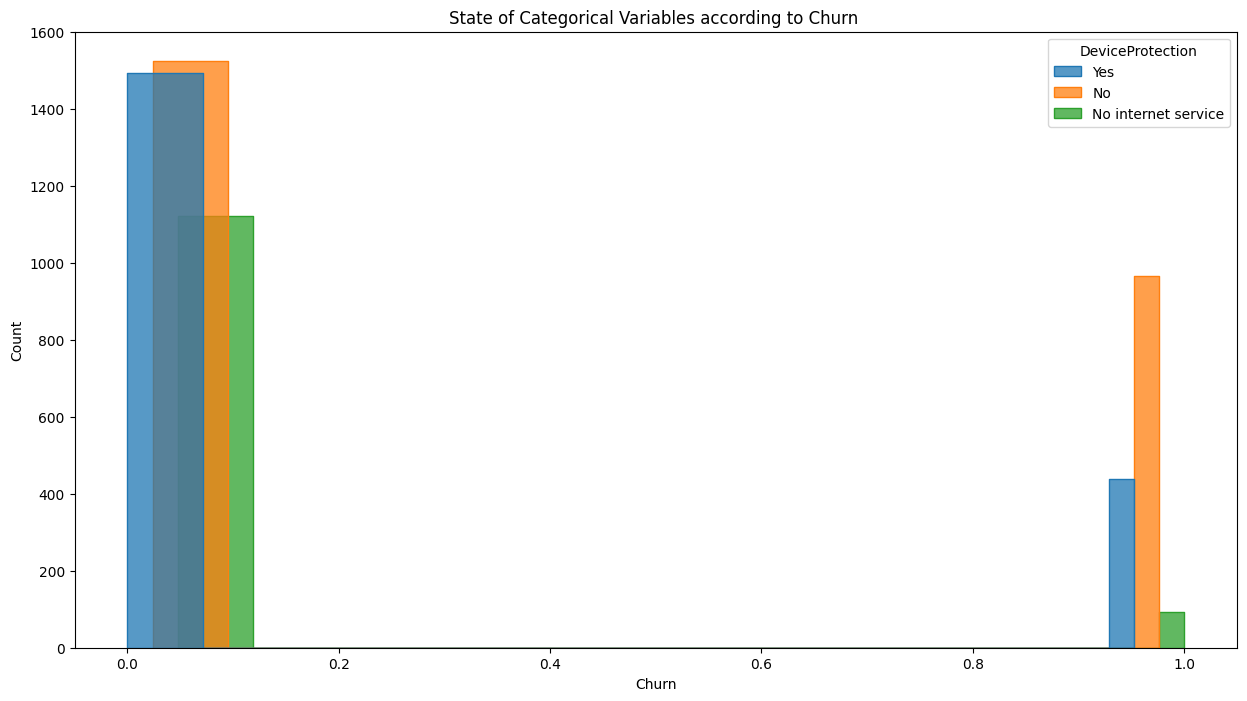

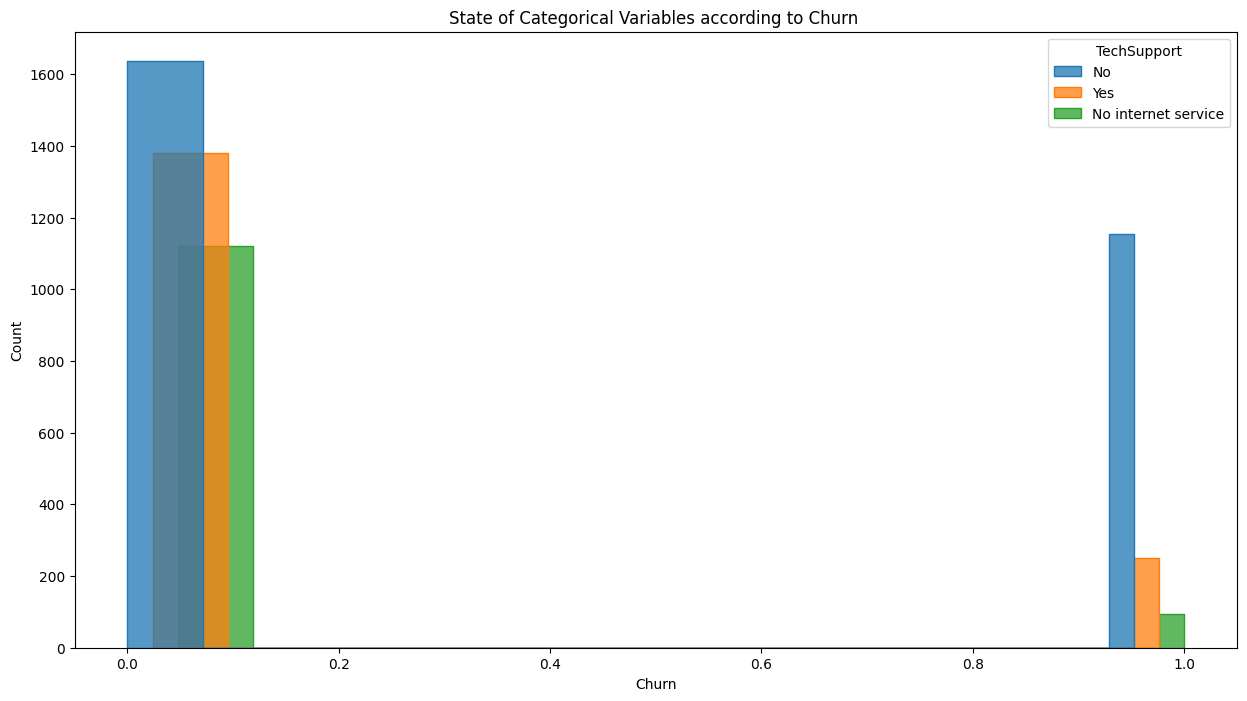

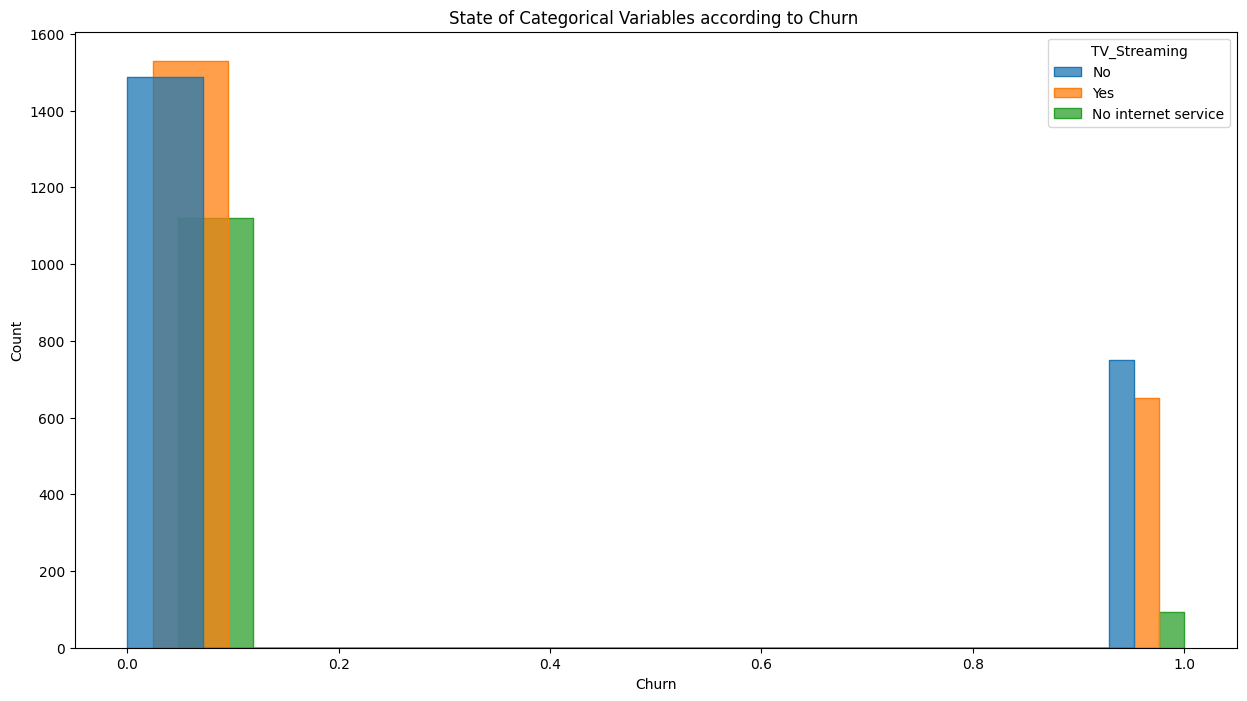

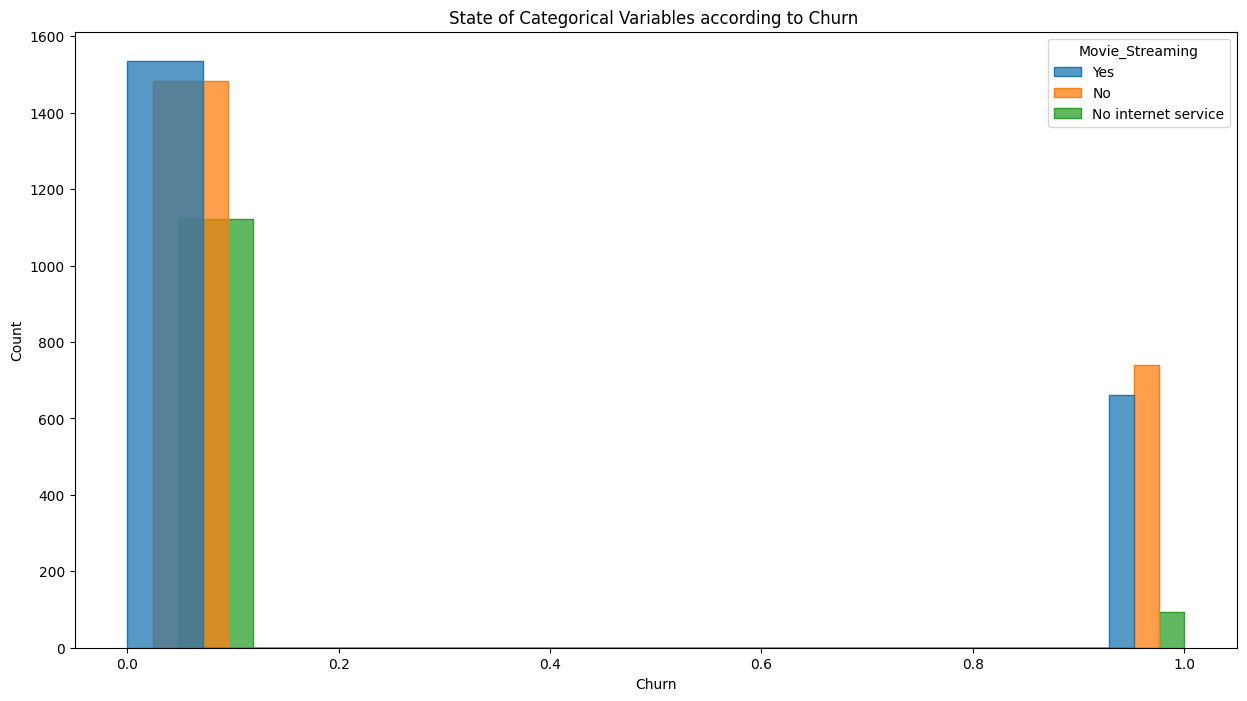

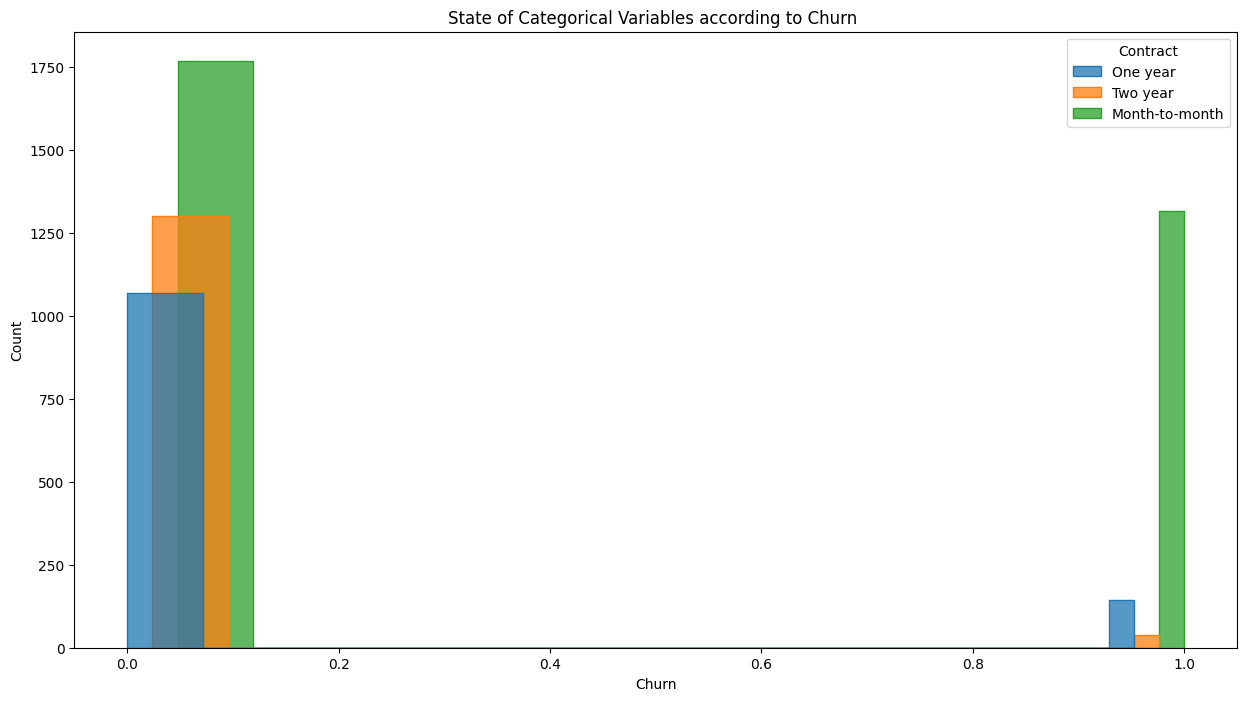

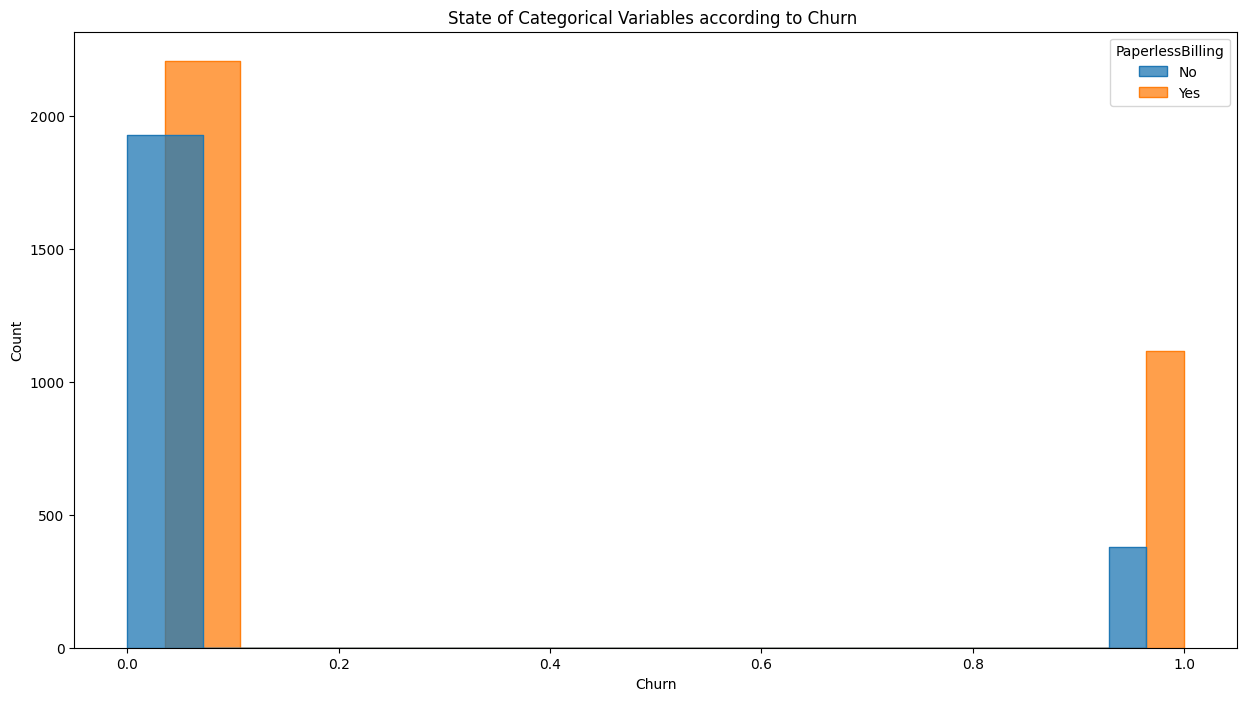

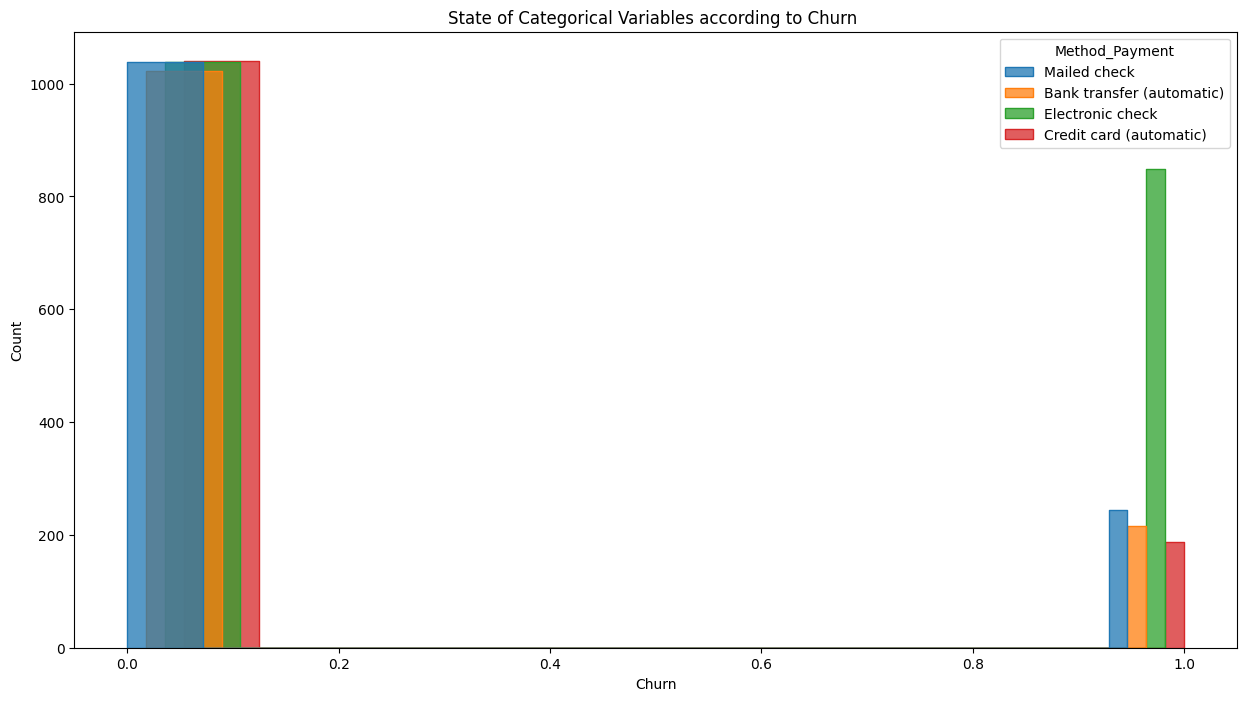

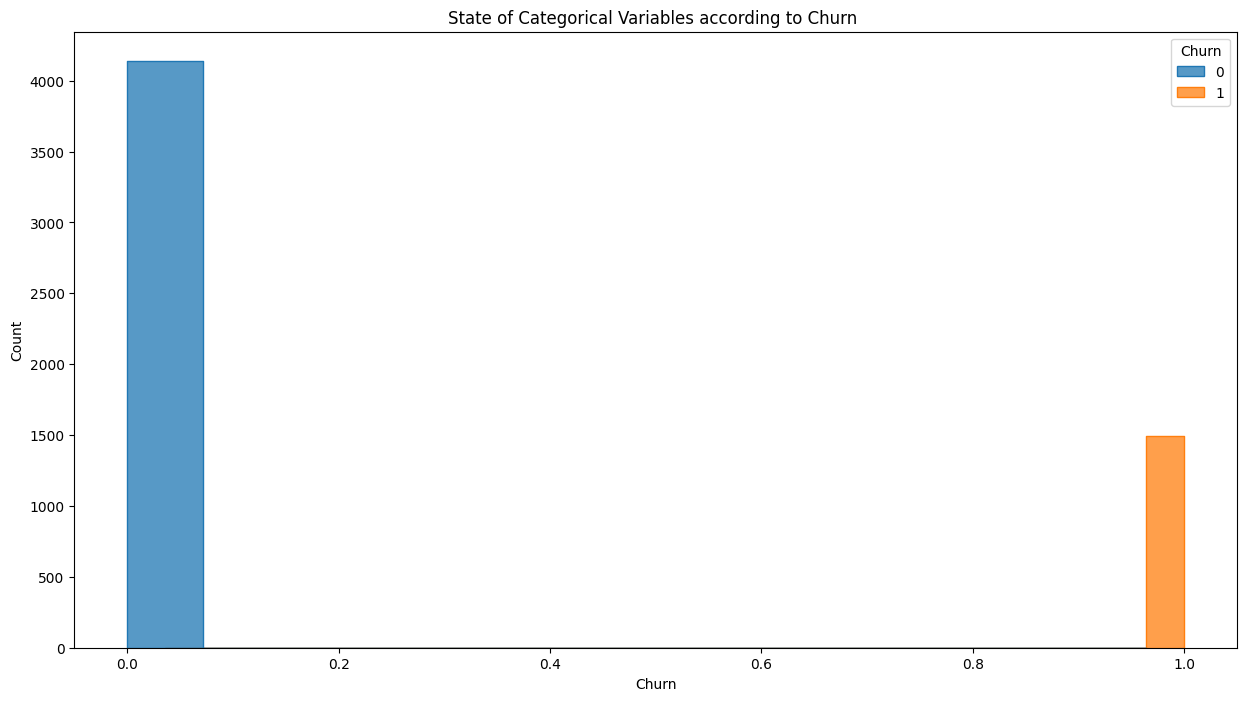

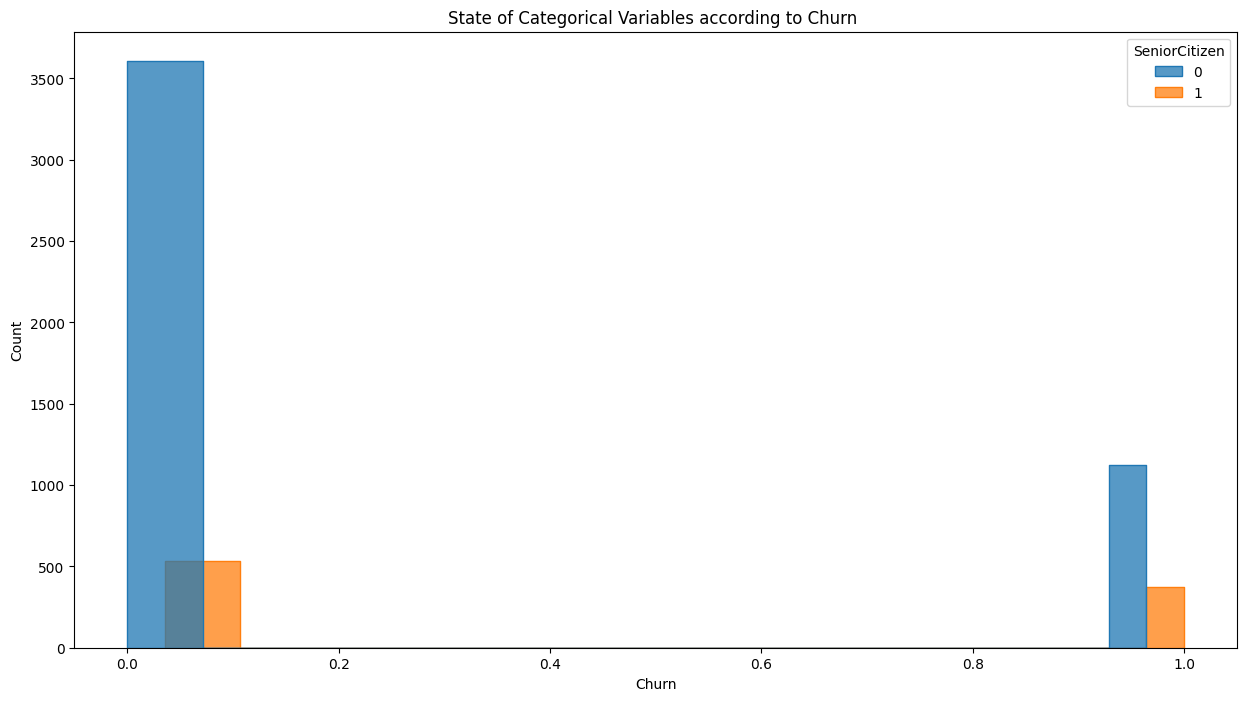

In [20]:
def target_vs_category_visual(dataframe,target, categorical_col):
    plt.figure(figsize=(15,8))
    sns.histplot(x=target,hue=categorical_col, data=dataframe,element="step",multiple="dodge")
    plt.title("State of Categorical Variables according to Churn ")
    plt.show()

def target_summary_with_cat(dataframe,target,categorical_col):
    print(pd.DataFrame({"CHURN_MEAN": dataframe.groupby(categorical_col)[target].mean()}))
    print(20*"-")


for col in cat_cols:
    target_vs_category_visual(df,"Churn",col)

# **Categorical Variables for Churn mean**

In [21]:
for col in cat_cols:
    target_summary_with_cat(df,"Churn",col)

        CHURN_MEAN
gender            
Female    0.270841
Male      0.260478
--------------------
         CHURN_MEAN
Partner            
No         0.326446
Yes        0.200733
--------------------
            CHURN_MEAN
Dependents            
No            0.312326
Yes           0.155674
--------------------
              CHURN_MEAN
PhoneService            
No              0.253623
Yes             0.266824
--------------------
                  CHURN_MEAN
MultipleLines               
No                  0.251397
No phone service    0.253623
Yes                 0.284105
--------------------
                 CHURN_MEAN
InternetService            
DSL                0.191851
Fiber optic        0.415558
No                 0.076606
--------------------
                     CHURN_MEAN
OnlineSecurity                 
No                     0.416014
No internet service    0.076606
Yes                    0.145342
--------------------
                     CHURN_MEAN
OnlineBackup                

# **Group 1 : Customer Information :**
gender | SeniorCitizen | Partner | Dependents

In [22]:
gender = df[df['Churn'] == 1]['gender'].value_counts()
gender = [gender[0] / sum(gender) * 100, gender[1] / sum(gender) * 100] # Female / Male

seniorcitizen = df[df['Churn'] == 1]['SeniorCitizen'].value_counts()
seniorcitizen = [seniorcitizen[0] / sum(seniorcitizen) * 100,seniorcitizen[1] / sum(seniorcitizen) * 100] # No - Yes

partner = df[df['Churn'] == 1]['Partner'].value_counts()
partner = [partner[0] / sum(partner) * 100,partner[1] / sum(partner) * 100] # No - Yes

dependents = df[df['Churn'] == 1]['Dependents'].value_counts()
dependents = [dependents[0] / sum(dependents) * 100,dependents[1] / sum(dependents) * 100] # No - Yes

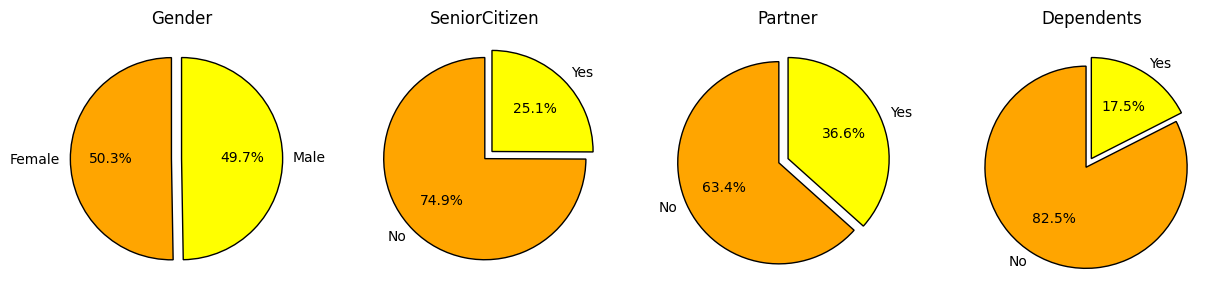

In [23]:
ax,fig = plt.subplots(nrows = 1,ncols = 4,figsize = (15,15))

plt.subplot(1,4,1)
plt.pie(gender,labels = ['Female','Male'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Gender');

plt.subplot(1,4,2)
plt.pie(seniorcitizen,labels = ['No', 'Yes'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('SeniorCitizen');

plt.subplot(1,4,3)
plt.pie(partner,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Partner');

plt.subplot(1,4,4)
plt.pie(dependents,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Dependents');

# **Group 2: Services Subscribed by the Customer :**

PhoneService | MultipleLines | InternetService | StreamingTV | StreamingMovies |

In [25]:
phoneservice = df[df['Churn'] == 1]['PhoneService'].value_counts()
phoneservice = [phoneservice[0] / sum(phoneservice) * 100, phoneservice[1] / sum(phoneservice) * 100] # No - Yes

multiplelines = df[df['Churn'] == 1]['MultipleLines'].value_counts()
multiplelines = [multiplelines[0] / sum(multiplelines) * 100,multiplelines[1] / sum(multiplelines) * 100, multiplelines[2] / sum(multiplelines) * 100] # No - No Phone Service - Yes

internetservice = df[df['Churn'] == 1]['InternetService'].value_counts()
internetservice = [internetservice[0] / sum(internetservice) * 100,internetservice[1] / sum(internetservice) * 100, internetservice[2] / sum(internetservice) * 100] # DSL - Fiber Optic - No

streamingtv = df[df['Churn'] == 1]['TV_Streaming'].value_counts()
streamingtv = [streamingtv[0] / sum(streamingtv) * 100,streamingtv[1] / sum(streamingtv) * 100, streamingtv[2] / sum(streamingtv) * 100] # No - No Internet Service - Yes

streamingmovies = df[df['Churn'] == 1]['Movie_Streaming'].value_counts()
streamingmovies = [streamingmovies[0] / sum(streamingmovies) * 100,streamingmovies[1] / sum(streamingmovies) * 100, streamingmovies[2] / sum(streamingmovies) * 100] # No - No Internet Service - Yes

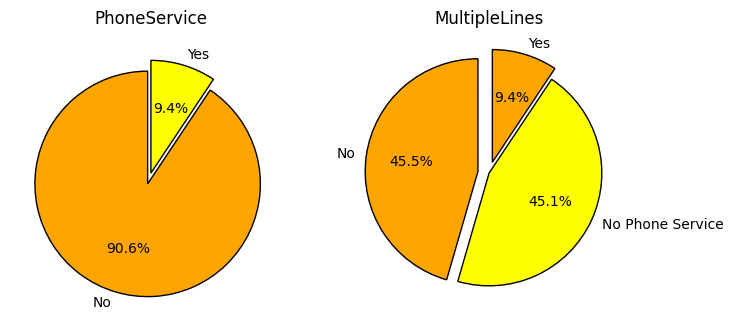

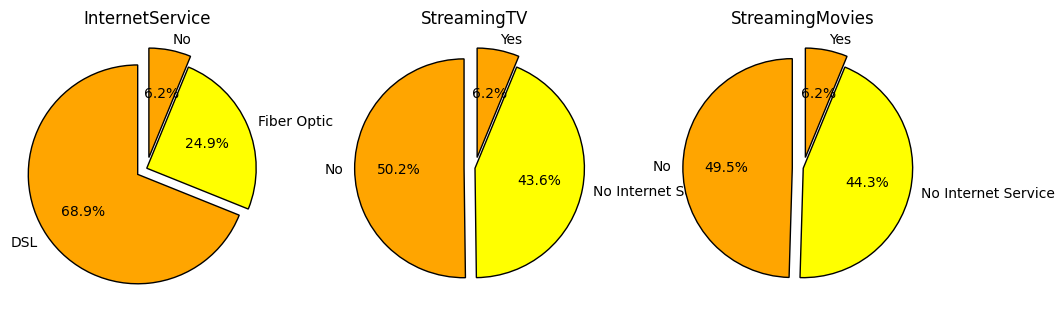

In [26]:
ax,fig = plt.subplots(nrows = 1,ncols = 2,figsize = (8,8))

plt.subplot(1,2,1)
plt.pie(phoneservice,labels = ['No', 'Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('PhoneService');

plt.subplot(1,2,2)
plt.pie(multiplelines,labels = ['No','No Phone Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('MultipleLines');

ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (12,12))

plt.subplot(1,3,1)
plt.pie(internetservice,labels = ['DSL', 'Fiber Optic','No'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('InternetService');

plt.subplot(1,3,2)
plt.pie(streamingtv,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('StreamingTV');

plt.subplot(1,3,3)
plt.pie(streamingmovies,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('StreamingMovies');

# **Group 2: Services Subscribed by the Customer**

OnlineSecurity | OnlineBackup | DeviceProtection | TechSupport

In [27]:
onlinesecurity = df[df['Churn'] == 1]['OnlineSecurity'].value_counts()
onlinesecurity = [onlinesecurity[0] / sum(onlinesecurity) * 100,onlinesecurity[1] / sum(onlinesecurity) * 100, onlinesecurity[2] / sum(onlinesecurity) * 100] # No - No Internet Service - Yes

onlinebackup = df[df['Churn'] == 1]['OnlineBackup'].value_counts()
onlinebackup = [onlinebackup[0] / sum(onlinebackup) * 100,onlinebackup[1] / sum(onlinebackup) * 100, onlinebackup[2] / sum(onlinebackup) * 100] # No - No Internet Service - Yes

deviceprotection = df[df['Churn'] == 1]['DeviceProtection'].value_counts()
deviceprotection = [deviceprotection[0] / sum(deviceprotection) * 100,deviceprotection[1] / sum(deviceprotection) * 100, deviceprotection[2] / sum(deviceprotection) * 100] # No - No Internet Service - Yes

techsupport = df[df['Churn'] == 1]['TechSupport'].value_counts()
techsupport = [techsupport[0] / sum(techsupport) * 100,techsupport[1] / sum(techsupport) * 100, techsupport[2] / sum(techsupport) * 100] # No - No Internet Service - Yes

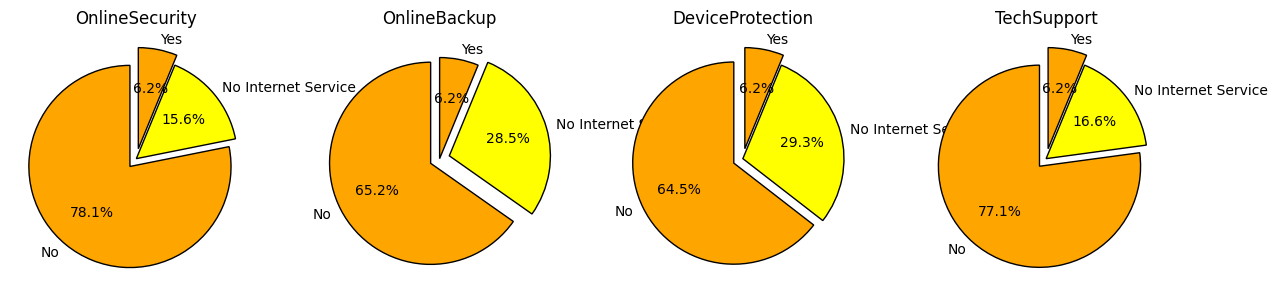

In [28]:
ax,fig = plt.subplots(nrows = 1,ncols = 4,figsize = (15,15))

plt.subplot(1,4,1)
plt.pie(onlinesecurity,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('OnlineSecurity');

plt.subplot(1,4,2)
plt.pie(onlinebackup,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('OnlineBackup');

plt.subplot(1,4,3)
plt.pie(deviceprotection,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('DeviceProtection');

plt.subplot(1,4,4)
plt.pie(techsupport,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('TechSupport');

# **Group 3 : Contract | PaperlessBilling | PaymentMethod |**

In [30]:
contract = df[df['Churn'] == 1]['Contract'].value_counts()
contract = [contract[0] / sum(contract) * 100, contract[1] / sum(contract) * 100, contract[2] / sum(contract) * 100] # Month-to-month - One year - Two year

paperlessbilling = df[df['Churn'] == 1]['PaperlessBilling'].value_counts()
paperlessbilling = [paperlessbilling[0] / sum(paperlessbilling) * 100,paperlessbilling[1] / sum(paperlessbilling) * 100] # No - Yes

paymentmethod = df[df['Churn'] == 1]['Method_Payment'].value_counts()
paymentmethod = [paymentmethod[0] / sum(paymentmethod) * 100, paymentmethod[1] / sum(paymentmethod) * 100,
            paymentmethod[2] / sum(paymentmethod) * 100, paymentmethod[3] / sum(paymentmethod) * 100]

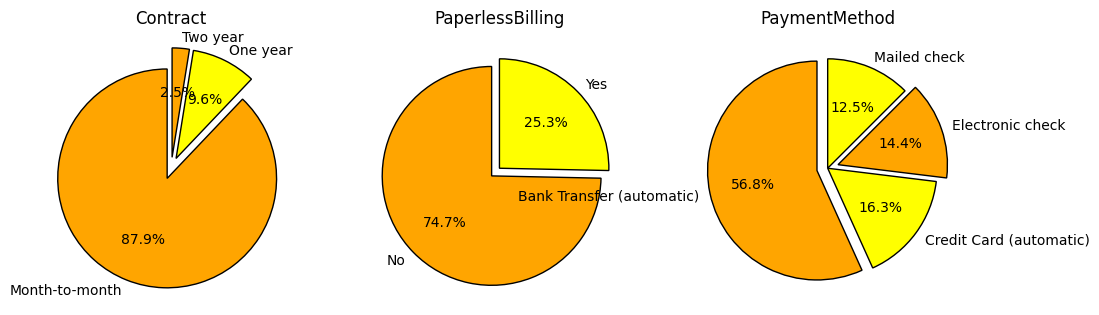

In [31]:
ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (12,12))

plt.subplot(1,3,1)
plt.pie(contract,labels = ['Month-to-month','One year','Two year'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0.1,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Contract');

plt.subplot(1,3,2)
plt.pie(paperlessbilling,labels = ['No', 'Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('PaperlessBilling');

plt.subplot(1,3,3)
plt.pie(paymentmethod,labels = ['Bank Transfer (automatic)','Credit Card (automatic)','Electronic check','Mailed check'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('PaymentMethod');

# **Numerical Variables vs Target Variable(Churn)**

In [32]:
def target_summary_with_num(dataframe,target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col:"mean"}), end="\n\n")
    print("###################################")


for col in num_cols:
    target_summary_with_num(df,"Churn",col)

          tenure
Churn           
0      37.438134
1      18.362968

###################################
       Charges_Month
Churn               
0          61.452900
1          74.300201

###################################
       TotalCharges
Churn              
0       2550.201547
1       1559.304479

###################################


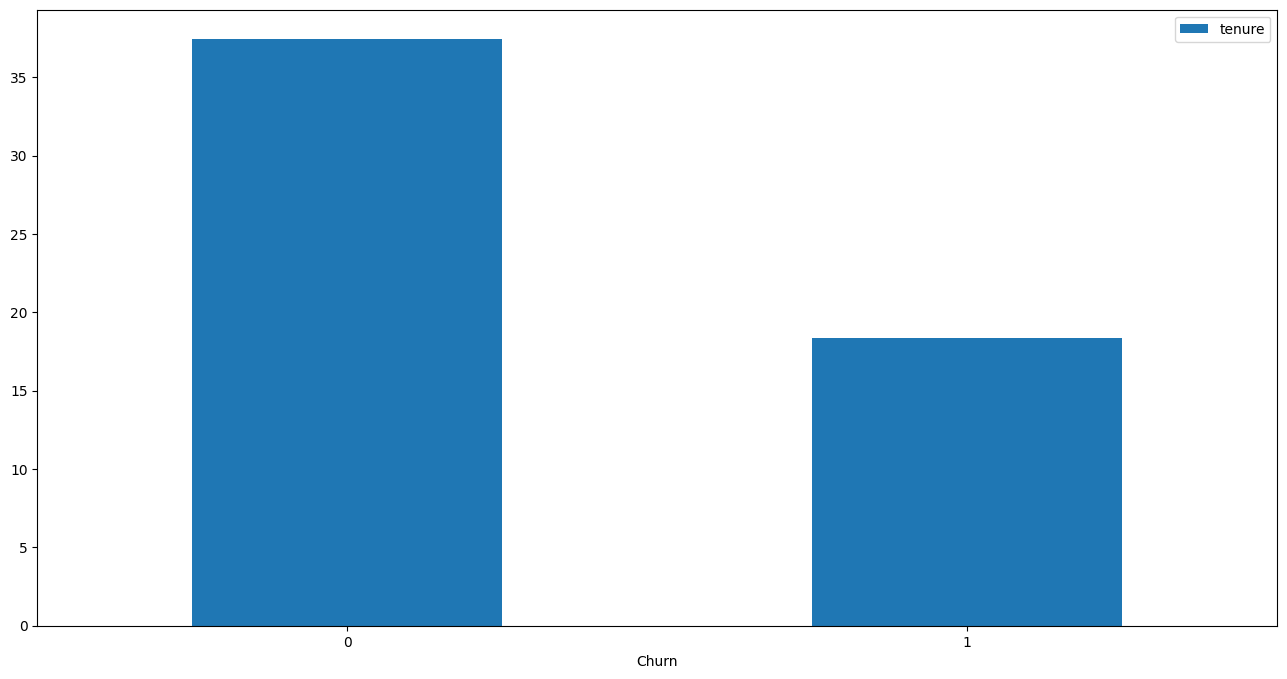

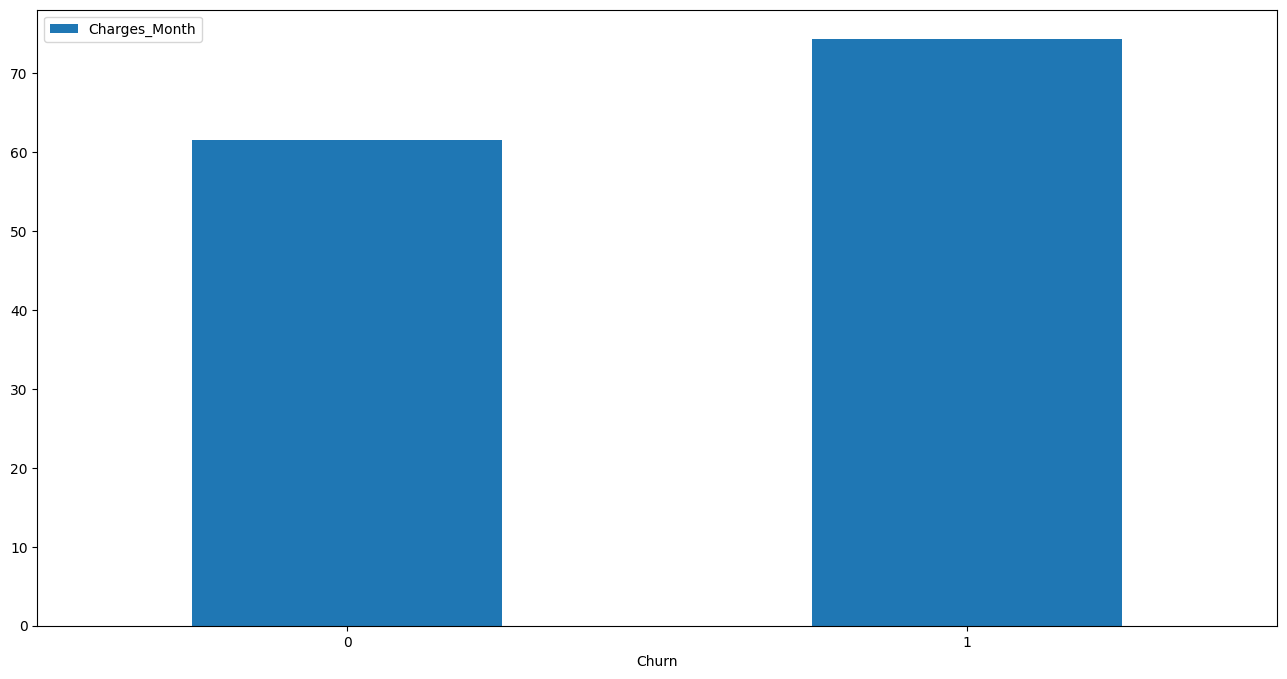

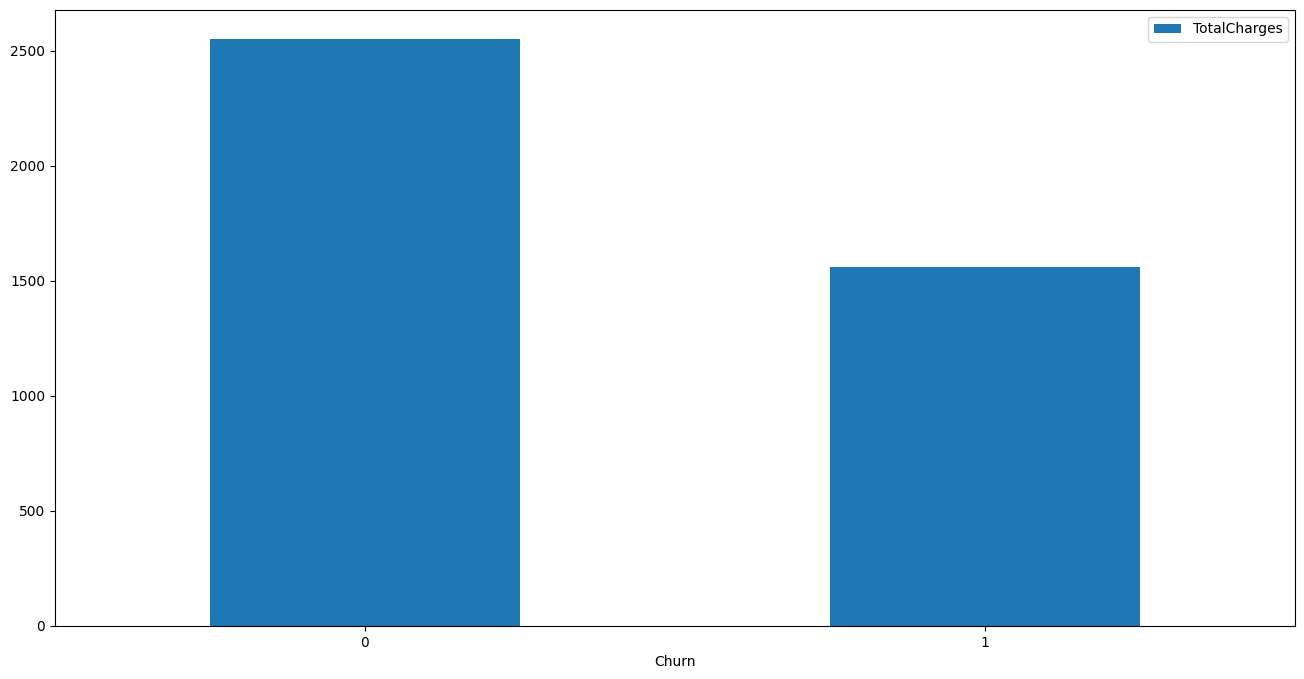

In [33]:
for col in num_cols:
    df.groupby('Churn').agg({col:'mean'}).plot(kind='bar', rot = 0,figsize=(16,8))

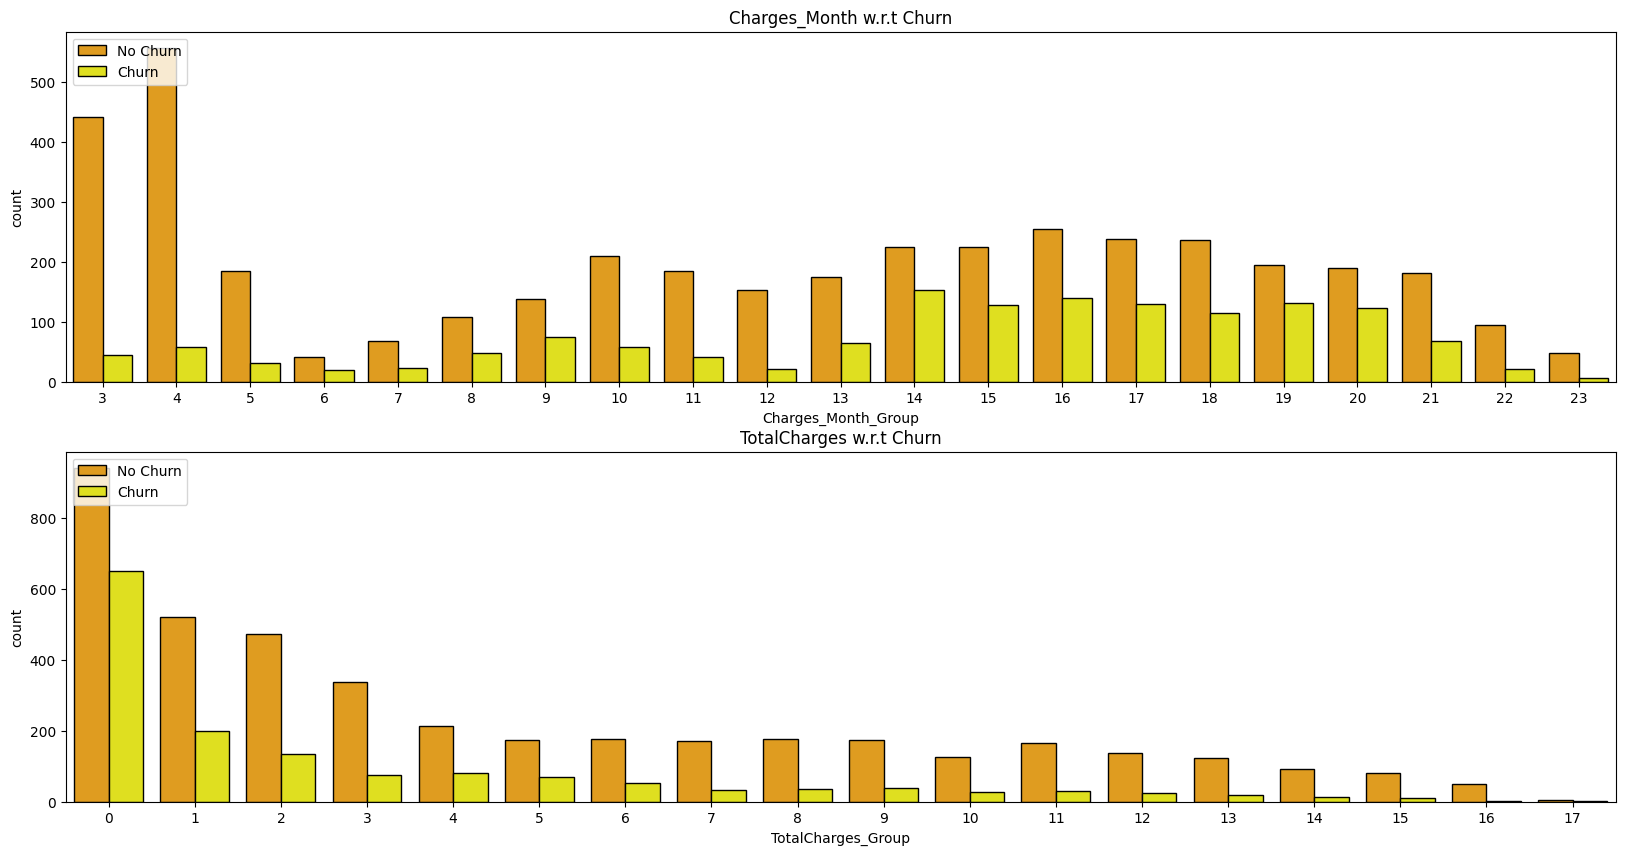

In [35]:
df['Charges_Month_Group'] = [int(i / 5) for i in df['Charges_Month']]
df['TotalCharges_Group'] = [int(i / 500) for i in df['TotalCharges']]

fig, ax = plt.subplots(nrows = 2,ncols = 1,figsize = (20,10))
for i in range(len(num_cols[1:])):
    plt.subplot(2,1,i+1)
    sns.countplot(x = num_cols[1 + i]+'_Group',data = df,hue = "Churn",palette = colors,edgecolor = 'black')
    plt.legend(['No Churn','Churn'],loc = 'upper left')
    title = num_cols[1 + i] + ' w.r.t Churn'
    plt.title(title);

# **Numerical features vs Categorical features w.r.t Target variable (Churn)**

In [36]:
l1 = ['gender','SeniorCitizen','Partner','Dependents'] # Customer Information
l2 = ['PhoneService','MultipleLines','InternetService','TV_Streaming','Movie_Streaming',
      'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport'] # Services Signed Up for!
l3 = ['Contract','PaperlessBilling','Method_Payment'] # Payment Information

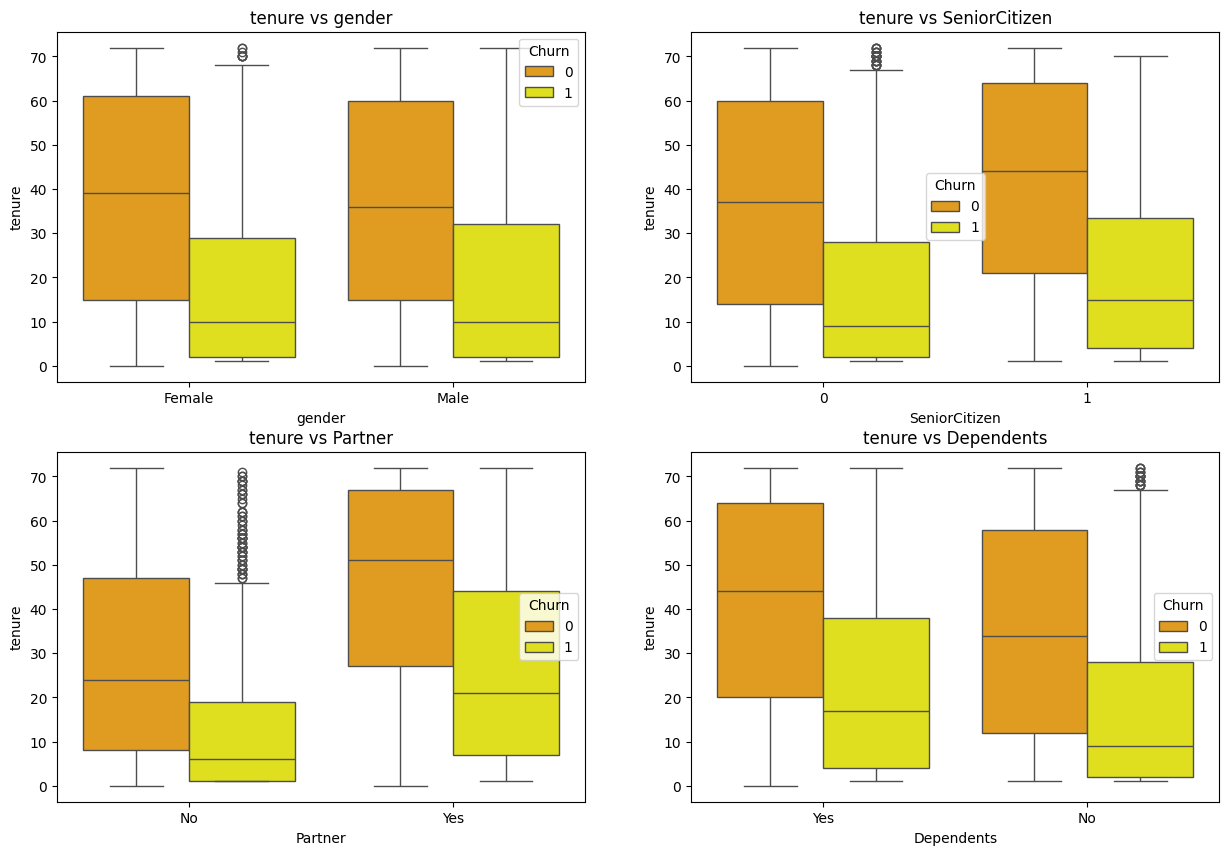

In [37]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    ax = sns.boxplot(x = l1[i],y = 'tenure',data = df,hue = 'Churn',palette = colors);
    plt.title('tenure vs ' + l1[i]);

# tenure vs Group 2: Services Subscribed by the Customer : PhoneService | MultipleLines | InternetService | StreamingTV | StreamingMovies

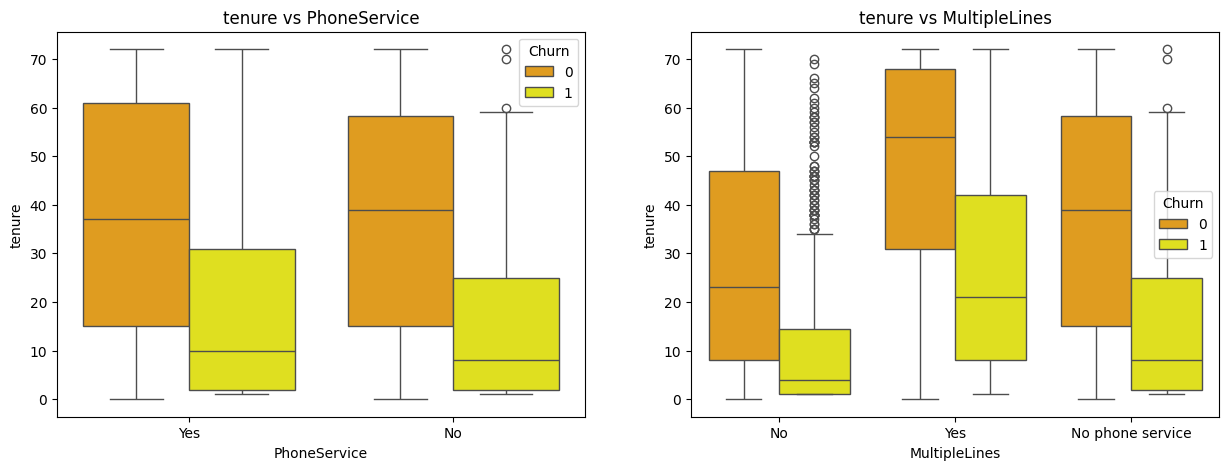

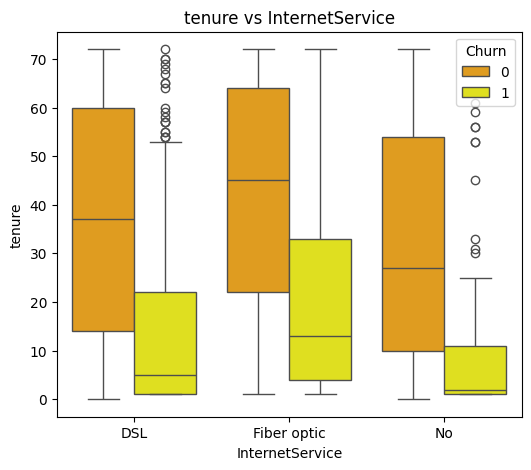

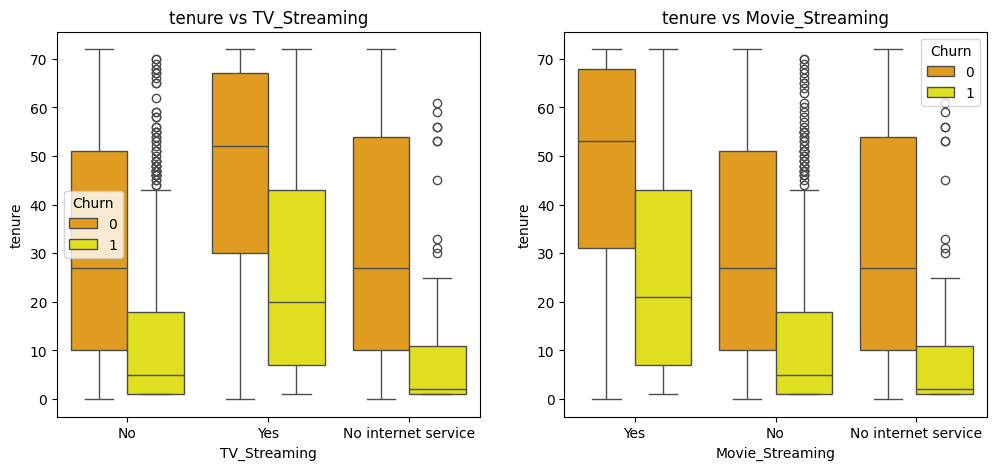

In [38]:
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))

for i in range(len(l2[0:2])):
    plt.subplot(1,2,i + 1)
    ax = sns.boxplot(x = l2[i],y = 'tenure',data = df,hue = 'Churn',palette = colors);
    plt.title('tenure vs ' + l2[i]);

fig = plt.subplots(nrows = 1, ncols = 1, figsize = (6,5))

plt.subplot(1,1,1)
ax = sns.boxplot(x = l2[2],y = 'tenure',data = df,hue = 'Churn',palette = colors);
plt.title('tenure vs ' + l2[2]);

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,5))

for i in range(len(l2[3:5])):
    plt.subplot(1,2,i + 1)
    ax = sns.boxplot(x = l2[i + 3],y = 'tenure',data = df,hue = 'Churn',palette = colors);
    plt.title('tenure vs ' + l2[i + 3]);

# tenure vs Group 2: Services Subscribed by the Customer : OnlineSecurity | OnlineBackup | DeviceProtection | TechSupport

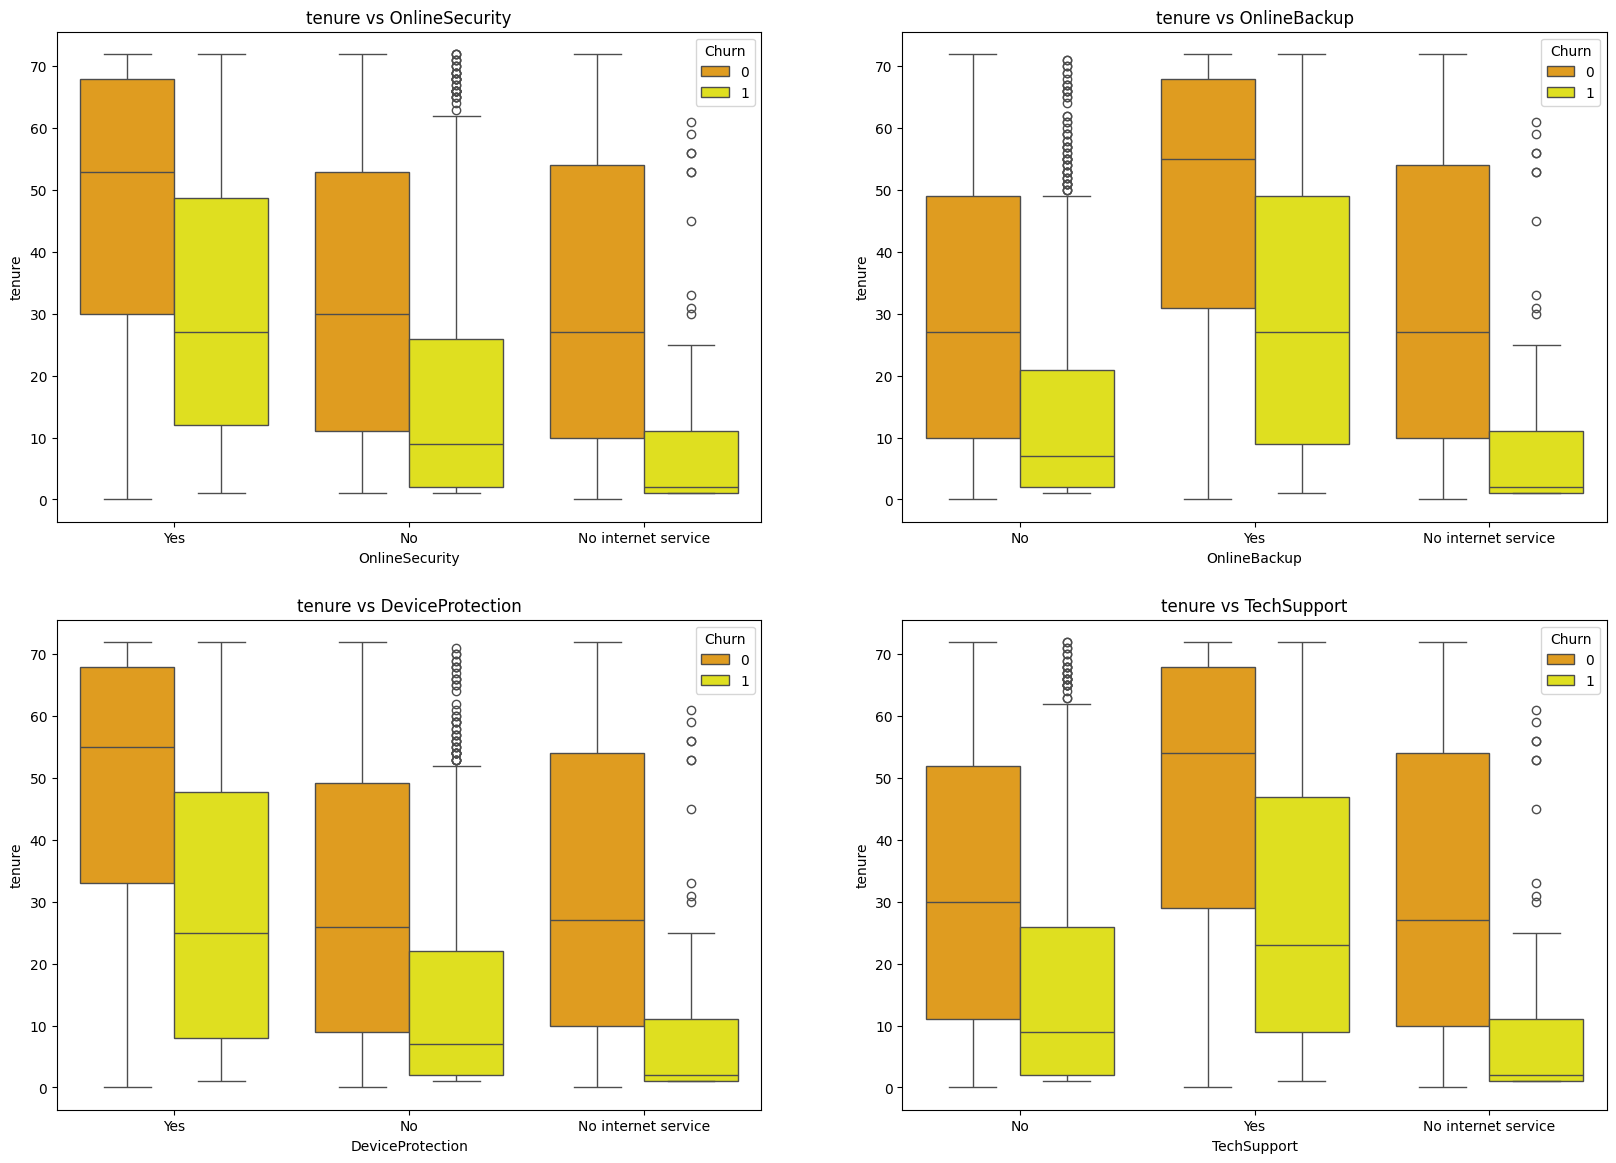

In [39]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(l2[-4:])):
    plt.subplot(2,2,i + 1)
    ax = sns.boxplot(x = l2[i - 4],y = 'tenure',data = df,hue = 'Churn',palette = colors);
    plt.title('tenure vs ' + l2[i-4]);

# **tenure vs Group 3 : Contract | PaperlessBilling | PaymentMethod |**

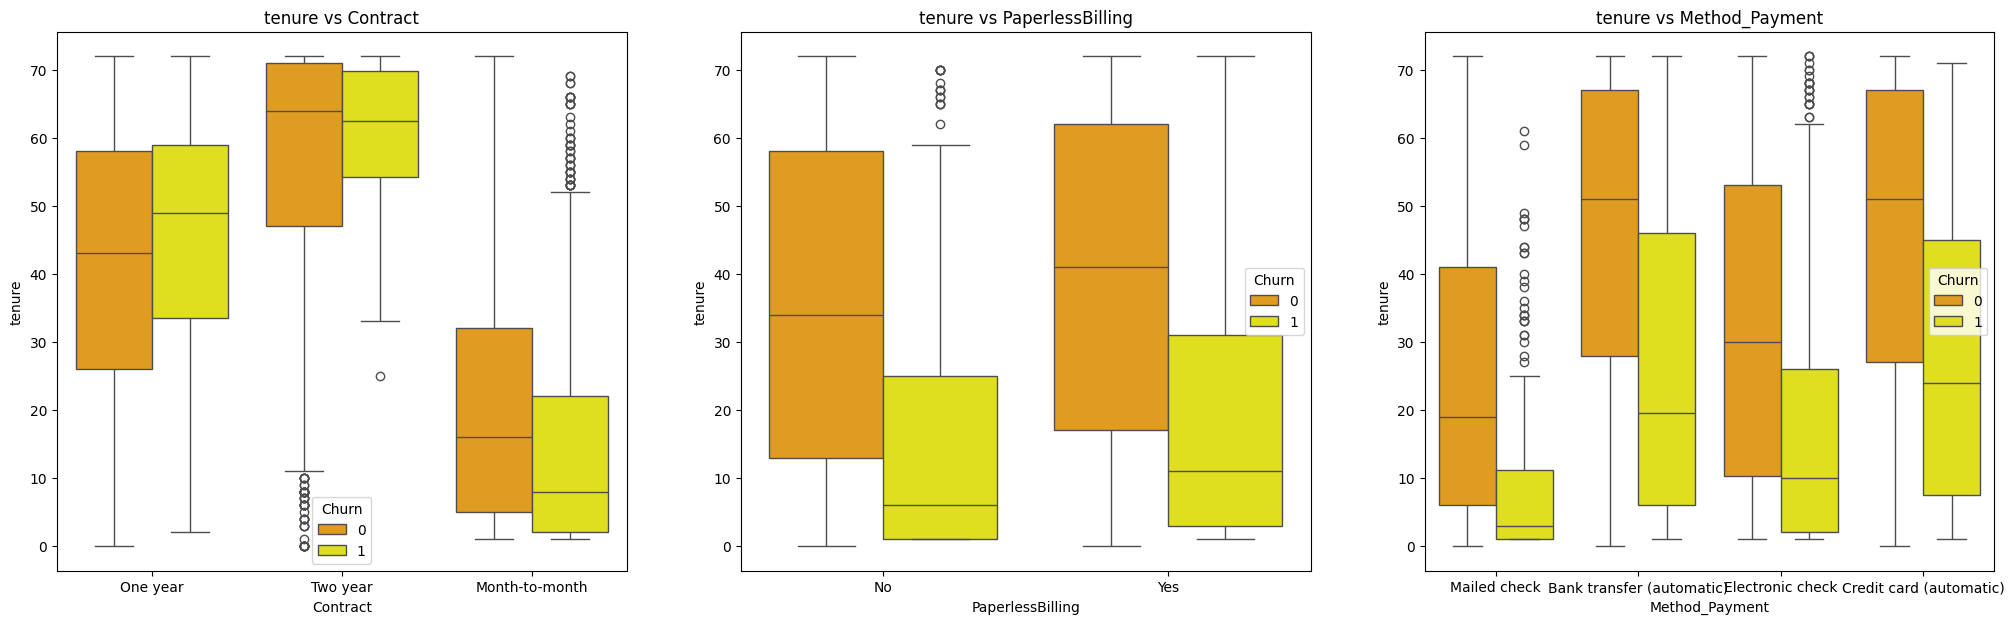

In [40]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
for i in range(len(l3)):
    plt.subplot(1,3,i + 1)
    ax = sns.boxplot(x = l3[i],y = 'tenure',data = df,hue = 'Churn',palette = colors);
    plt.title('tenure vs ' + l3[i]);

# **MonthlyCharges vs Group 1 : Customer Information : gender | SeniorCitizen | Partner | Dependents**

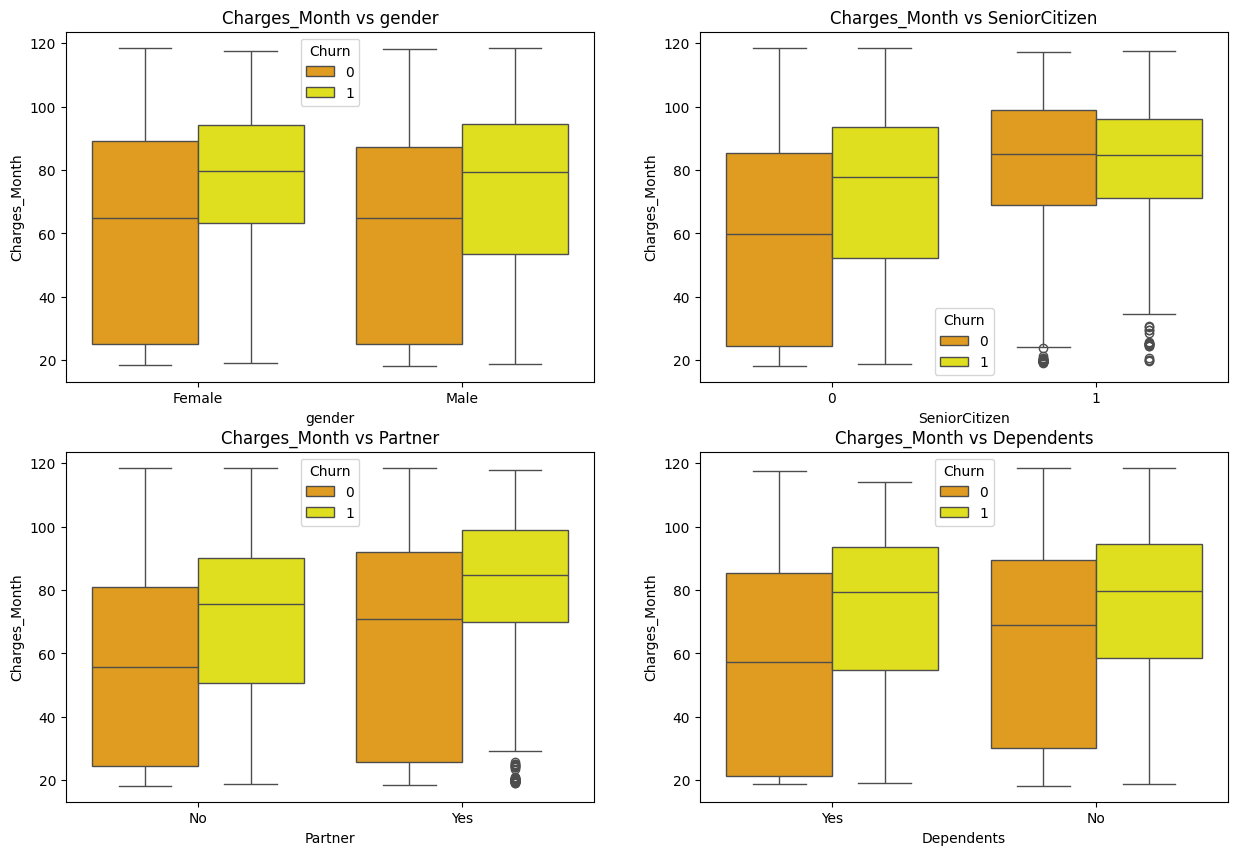

In [43]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    ax = sns.boxplot(x = l1[i],y = 'Charges_Month',data = df,hue = 'Churn',palette = colors);
    plt.title('Charges_Month vs ' + l1[i]);

## **MonthlyCharges vs Group 2: Services Subscribed by the Customer : PhoneService | MultipleLines | InternetService | StreamingTV | StreamingMovies**

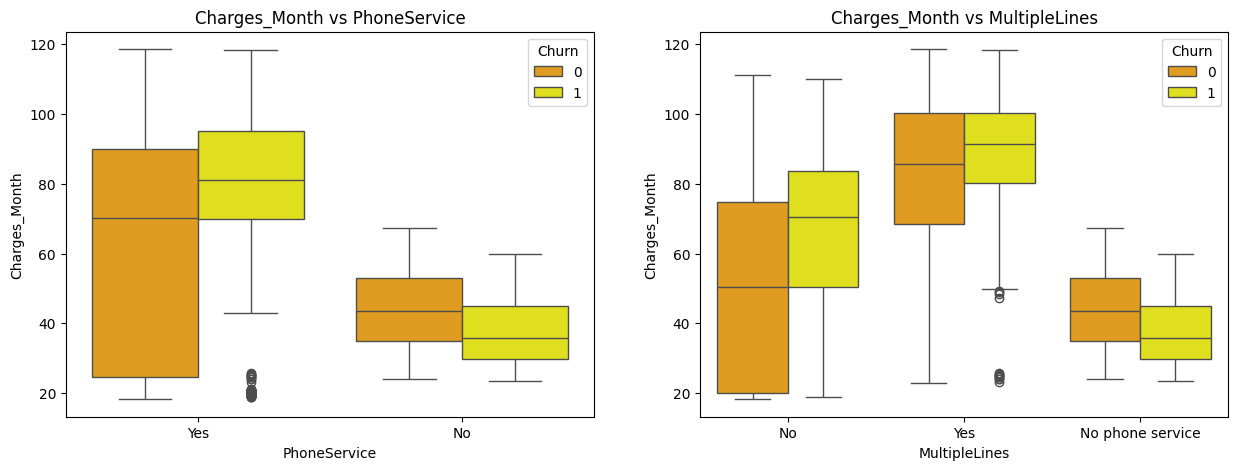

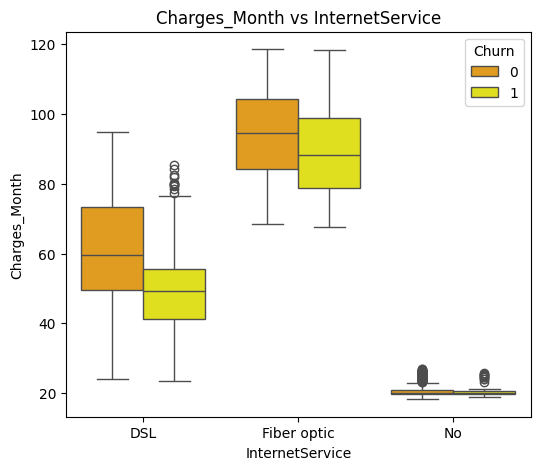

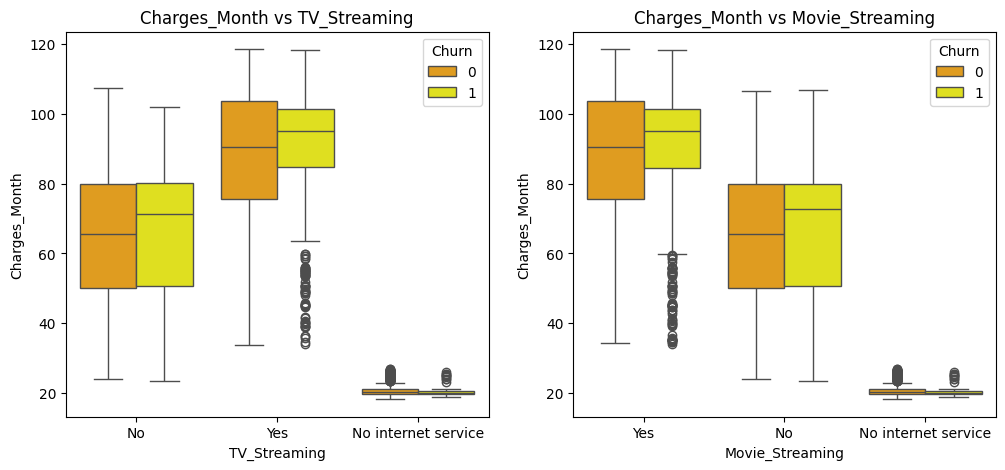

In [45]:
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))

for i in range(len(l2[0:2])):
    plt.subplot(1,2,i + 1)
    ax = sns.boxplot(x = l2[i],y = 'Charges_Month',data = df,hue = 'Churn',palette = colors);
    plt.title('Charges_Month vs ' + l2[i]);

fig = plt.subplots(nrows = 1, ncols = 1, figsize = (6,5))

plt.subplot(1,1,1)
ax = sns.boxplot(x = l2[2],y = 'Charges_Month',data = df,hue = 'Churn',palette = colors);
plt.title('Charges_Month vs ' + l2[2]);

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,5))

for i in range(len(l2[3:5])):
    plt.subplot(1,2,i + 1)
    ax = sns.boxplot(x = l2[i + 3],y = 'Charges_Month',data = df,hue = 'Churn',palette = colors);
    plt.title('Charges_Month vs ' + l2[i + 3]);

**MonthlyCharges vs Group 2: Services Subscribed by the Customer : OnlineSecurity | OnlineBackup | DeviceProtection | TechSupport**

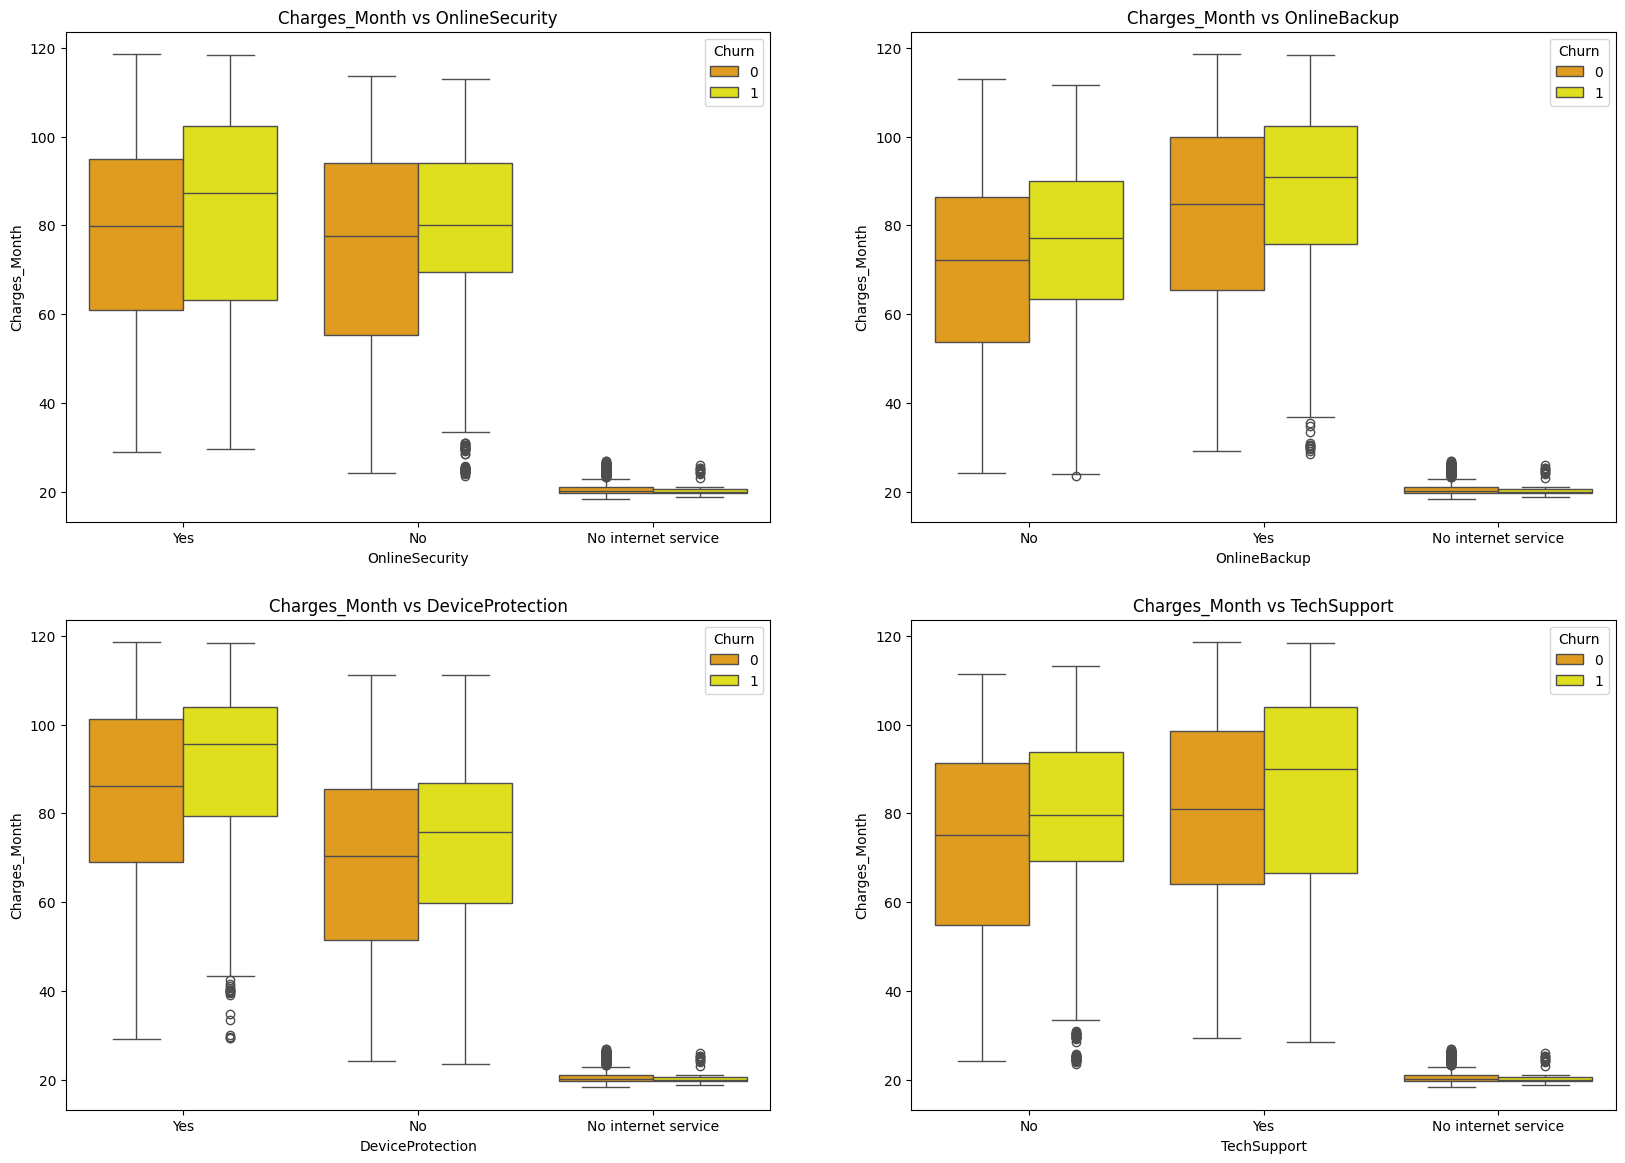

In [47]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(l2[-4:])):
    plt.subplot(2,2,i + 1)
    ax = sns.boxplot(x = l2[i - 4],y = 'Charges_Month',data = df,hue = 'Churn',palette = colors);
    plt.title('Charges_Month vs ' + l2[i-4]);

**MonthlyCharges vs Group 3 : Contract | PaperlessBilling | PaymentMethod**

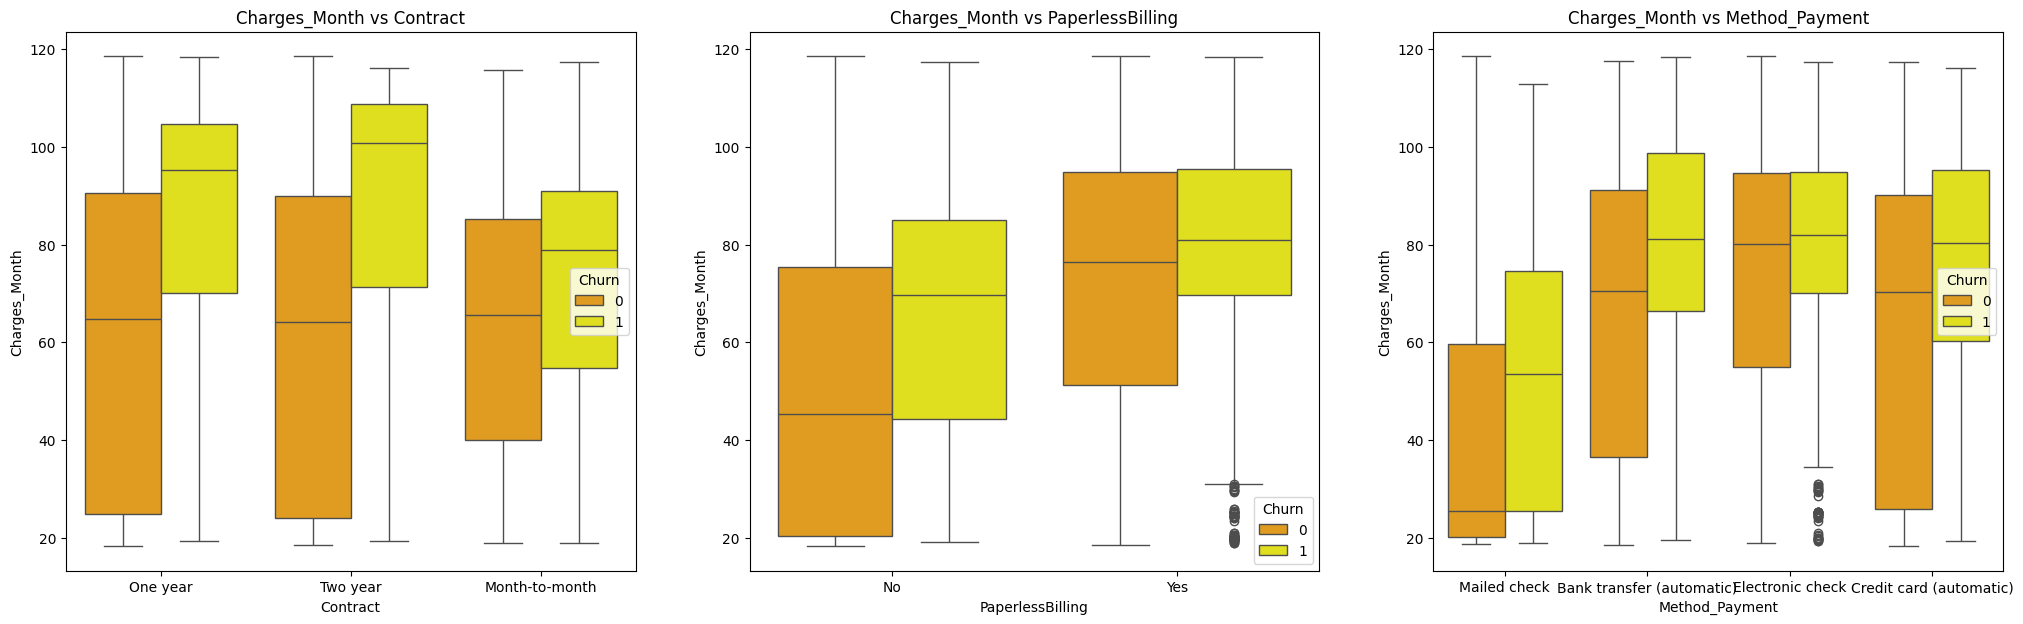

In [48]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))

for i in range(len(l3)):
    plt.subplot(1,3,i + 1)
    ax = sns.boxplot(x = l3[i],y = 'Charges_Month',data = df,hue = 'Churn',palette = colors);
    title = 'Charges_Month vs ' + l3[i]
    plt.title(title);

**TotalCharges vs Group 1 : Customer Information : gender | SeniorCitizen | Partner | Dependents**

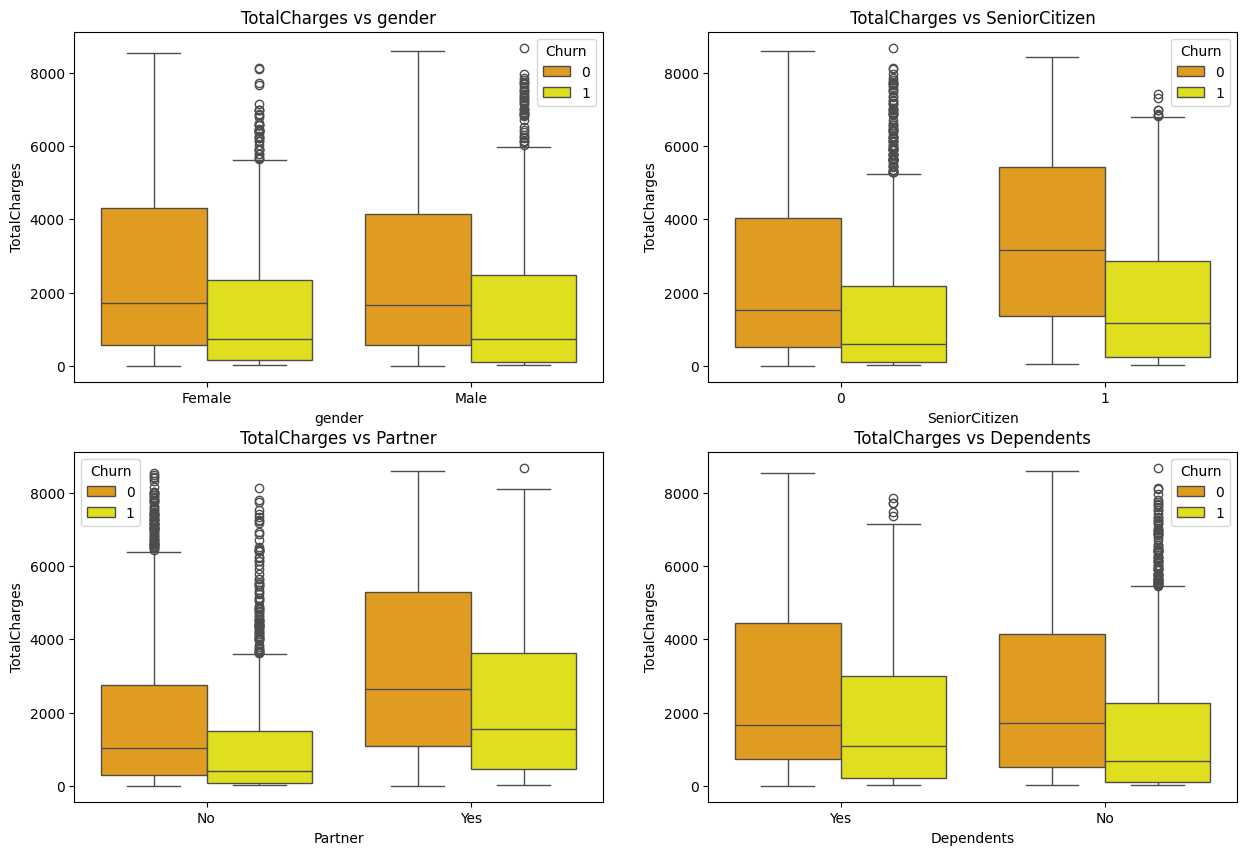

In [49]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    ax = sns.boxplot(x = l1[i],y = 'TotalCharges',data = df,hue = 'Churn',palette = colors);
    plt.title('TotalCharges vs ' + l1[i]);

**TotalCharges vs Group 2: Services Subscribed by the Customer : PhoneService | MultipleLines | InternetService | StreamingTV | StreamingMovies**

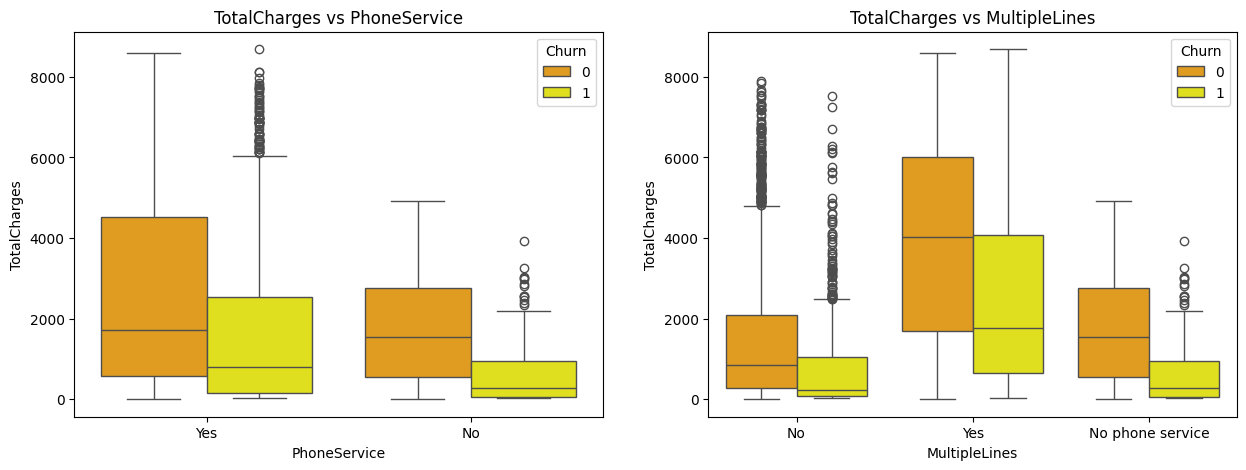

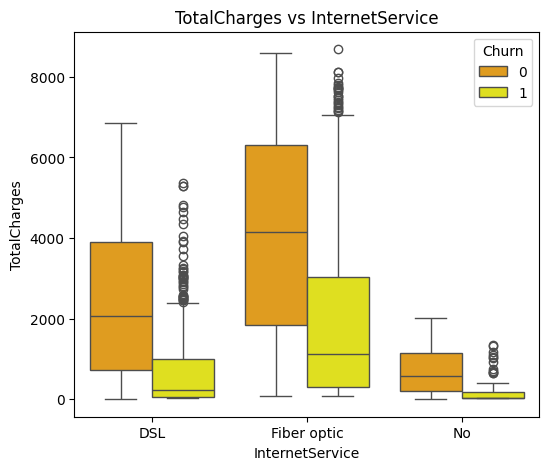

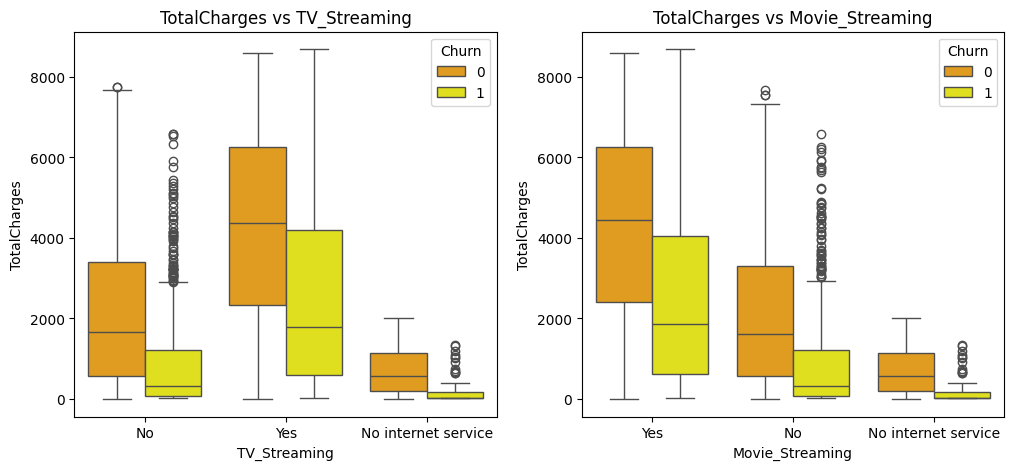

In [50]:
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))

for i in range(len(l2[0:2])):
    plt.subplot(1,2,i + 1)
    ax = sns.boxplot(x = l2[i],y = 'TotalCharges',data = df,hue = 'Churn',palette = colors);
    plt.title('TotalCharges vs ' + l2[i]);

fig = plt.subplots(nrows = 1, ncols = 1, figsize = (6,5))

plt.subplot(1,1,1)
ax = sns.boxplot(x = l2[2],y = 'TotalCharges',data = df,hue = 'Churn',palette = colors);
plt.title('TotalCharges vs ' + l2[2]);

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,5))

for i in range(len(l2[3:5])):
    plt.subplot(1,2,i + 1)
    ax = sns.boxplot(x = l2[i + 3],y = 'TotalCharges',data = df,hue = 'Churn',palette = colors);
    plt.title('TotalCharges vs ' + l2[i + 3]);

**TotalCharges vs Group 2: Services Subscribed by the Customer : OnlineSecurity | OnlineBackup | DeviceProtection | TechSupport |**

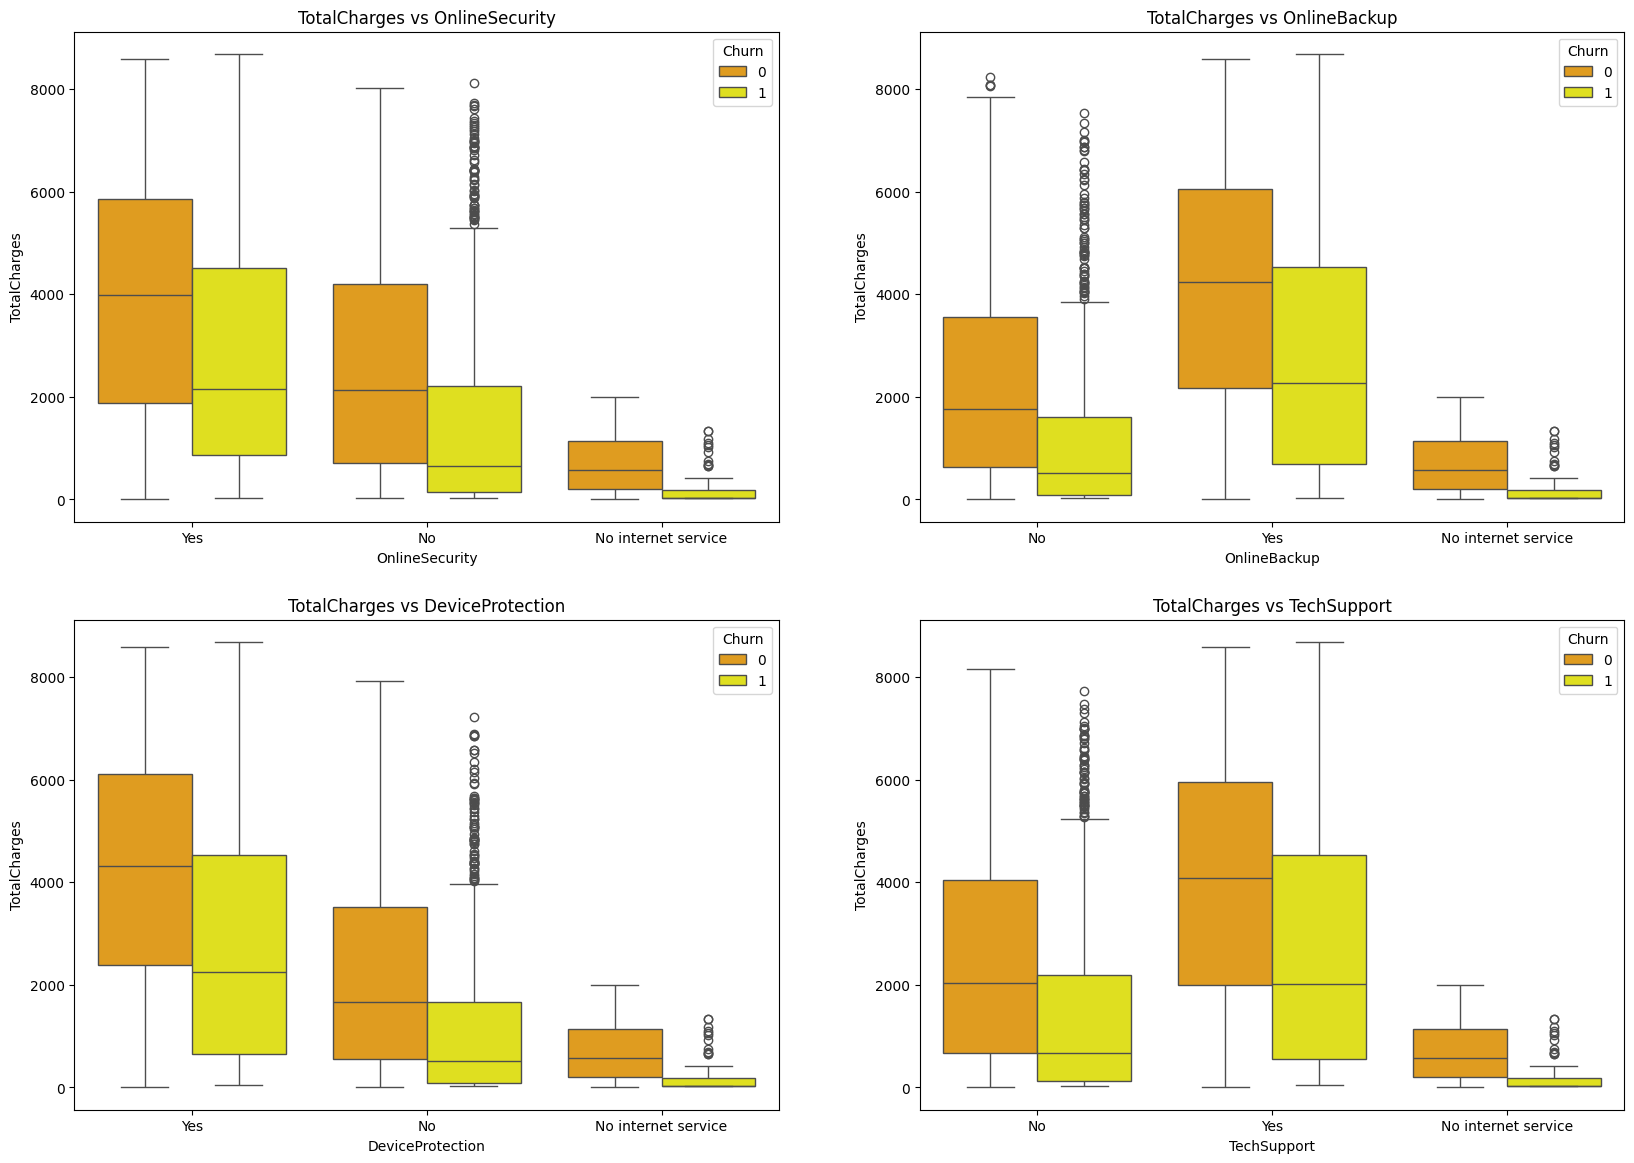

In [51]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(l2[-4:])):
    plt.subplot(2,2,i + 1)
    ax = sns.boxplot(x = l2[i - 4],y = 'TotalCharges',data = df,hue = 'Churn',palette = colors);
    plt.title('TotalCharges vs ' + l2[i-4]);

**TotalCharges vs Group 3 : Contract | PaperlessBilling | PaymentMethod |**

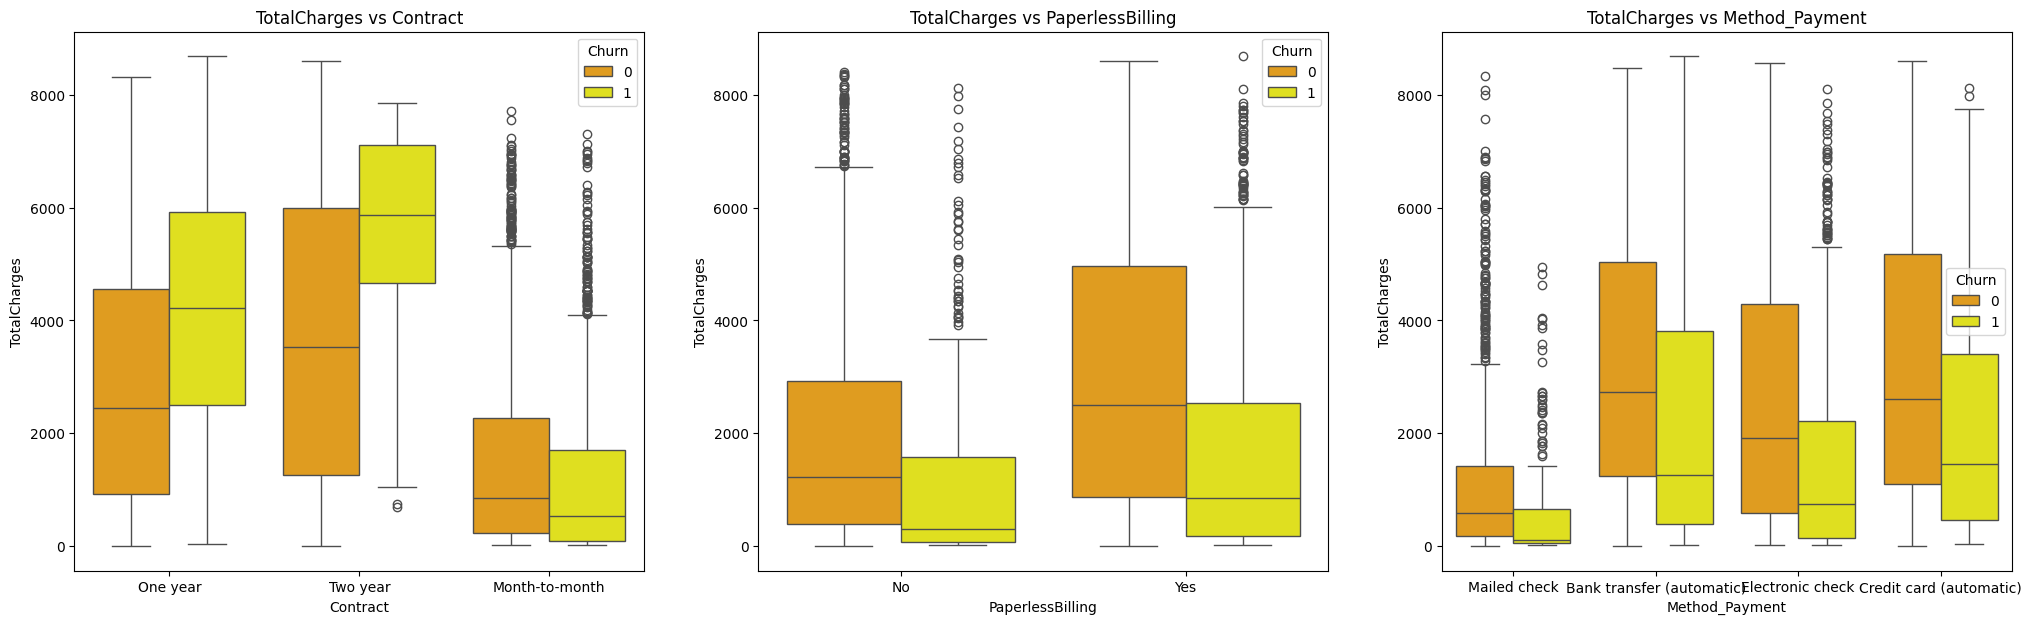

In [52]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))

for i in range(len(l3)):
    plt.subplot(1,3,i + 1)
    ax = sns.boxplot(x = l3[i],y = 'TotalCharges',data = df,hue = 'Churn',palette = colors);
    plt.title('TotalCharges vs ' + l3[i]);

**Numerical features vs Numerical features w.r.t Target variable (Churn) :**

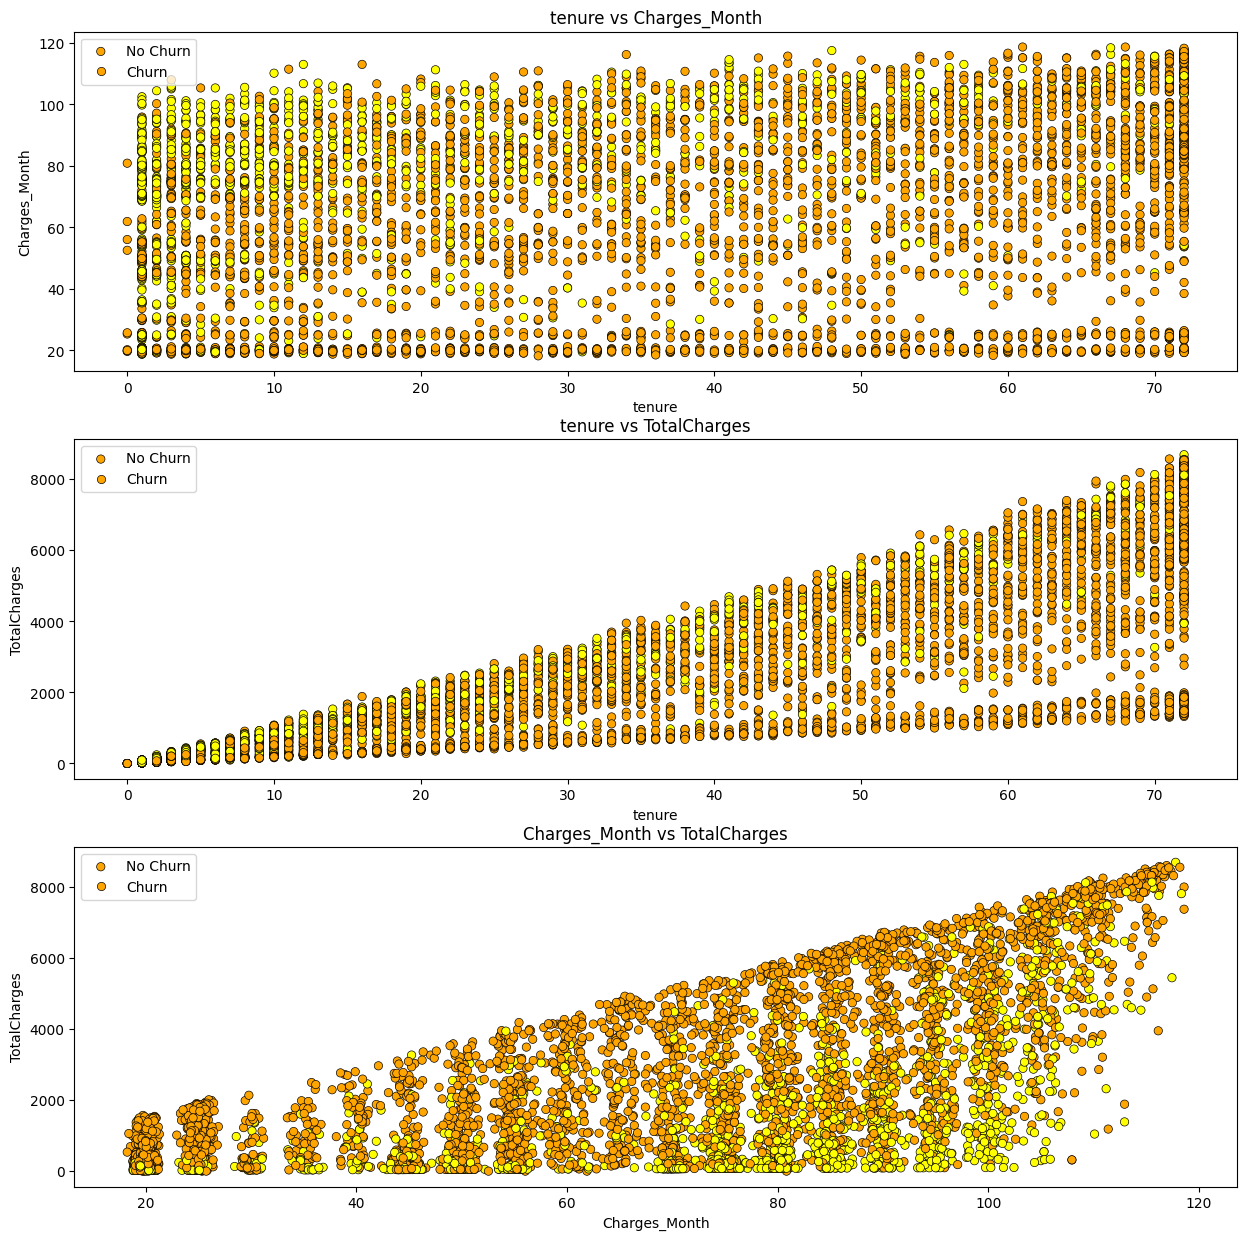

In [53]:
a = 0
fig,ax = plt.subplots(nrows = 3,ncols = 1,figsize = (15,15))
for i in range(len(num_cols)):
    for j in range(len(num_cols)):
        if i != j and j > i:
            a += 1
            plt.subplot(3,1,a)
            sns.scatterplot(x = num_cols[i],y = num_cols[j],data = df,hue = 'Churn',palette = colors,edgecolor = 'black');
            plt.legend(['No Churn','Churn'],loc = 'upper left',)
            title = num_cols[i] + ' vs ' + num_cols[j]
            plt.title(title)

In [62]:
check_data(df)

--------------------    Information     --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               5634 non-null   object 
 1   SeniorCitizen        5634 non-null   int64  
 2   Partner              5634 non-null   object 
 3   Dependents           5634 non-null   object 
 4   tenure               5634 non-null   float64
 5   PhoneService         5634 non-null   object 
 6   MultipleLines        5634 non-null   object 
 7   InternetService      5634 non-null   object 
 8   OnlineSecurity       5634 non-null   object 
 9   OnlineBackup         5634 non-null   object 
 10  DeviceProtection     5634 non-null   object 
 11  TechSupport          5634 non-null   object 
 12  TV_Streaming         5634 non-null   object 
 13  Movie_Streaming      5634 non-null   object 
 14  Contract             5634 n

In [63]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

# Check if the columns exist before dropping
if 'Charges_Month_Group' in df.columns and 'TotalCharges_Group' in df.columns:
    df.drop(columns = ['Charges_Month_Group','TotalCharges_Group'], inplace = True)
else:
    print("Warning: One or both columns not found in DataFrame.")

df['tenure'] = mms.fit_transform(df[['tenure']])
df['Charges_Month'] = mms.fit_transform(df[['Charges_Month']])
df['TotalCharges'] = mms.fit_transform(df[['TotalCharges']])
df.head()

gender  SeniorCitizen Partner Dependents    tenure PhoneService  \
0  Female              0      No        Yes  0.291667          Yes   
1  Female              0      No         No  0.750000          Yes   
2    Male              0     Yes         No  0.013889           No   
3    Male              0      No         No  0.055556          Yes   
4    Male              0      No        Yes  0.000000          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  ...  \
0                No             DSL            Yes           No  ...   
1               Yes     Fiber optic             No          Yes  ...   
2  No phone service             DSL             No           No  ...   
3                No     Fiber optic             No           No  ...   
4               Yes             DSL            Yes          Yes  ...   

  TechSupport TV_Streaming Movie_Streaming        Contract PaperlessBilling  \
0          No           No             Yes        One year               No   
1          No          Yes             Yes        Two year              Yes   
2          No           No              No  Month-to-month              Yes   
3          No           No              No  Month-to-month              Yes   
4         Yes           No              No        Two year              Yes   

              Method_Payment Charges_Month  TotalCharges  Churn  \
0               Mailed check      0.464375      0.153924      0   
1  Bank transfer (automatic)      0.786746      0.590624      0   
2           Electronic check      0.051819      0.002700      1   
3           Electronic check      0.517688      0.027398      1   
4  Bank transfer (automatic)      0.434978      0.000000      0   

   Charges_Month_Group  
0                   12  
1                   19  
2                    4  
3                   14  
4                   12  

[5 rows x 21 columns]

# **Correlation Matrix**

Column 'Partner' contains non-numeric values.
Column 'Dependents' contains non-numeric values.
Column 'PhoneService' contains non-numeric values.
Column 'MultipleLines' contains non-numeric values.
Column 'InternetService' contains non-numeric values.
Column 'OnlineSecurity' contains non-numeric values.
Column 'OnlineBackup' contains non-numeric values.
Column 'DeviceProtection' contains non-numeric values.
Column 'TechSupport' contains non-numeric values.
Column 'TV_Streaming' contains non-numeric values.
Column 'Movie_Streaming' contains non-numeric values.
Column 'Contract' contains non-numeric values.
Column 'PaperlessBilling' contains non-numeric values.
Column 'Method_Payment' contains non-numeric values.


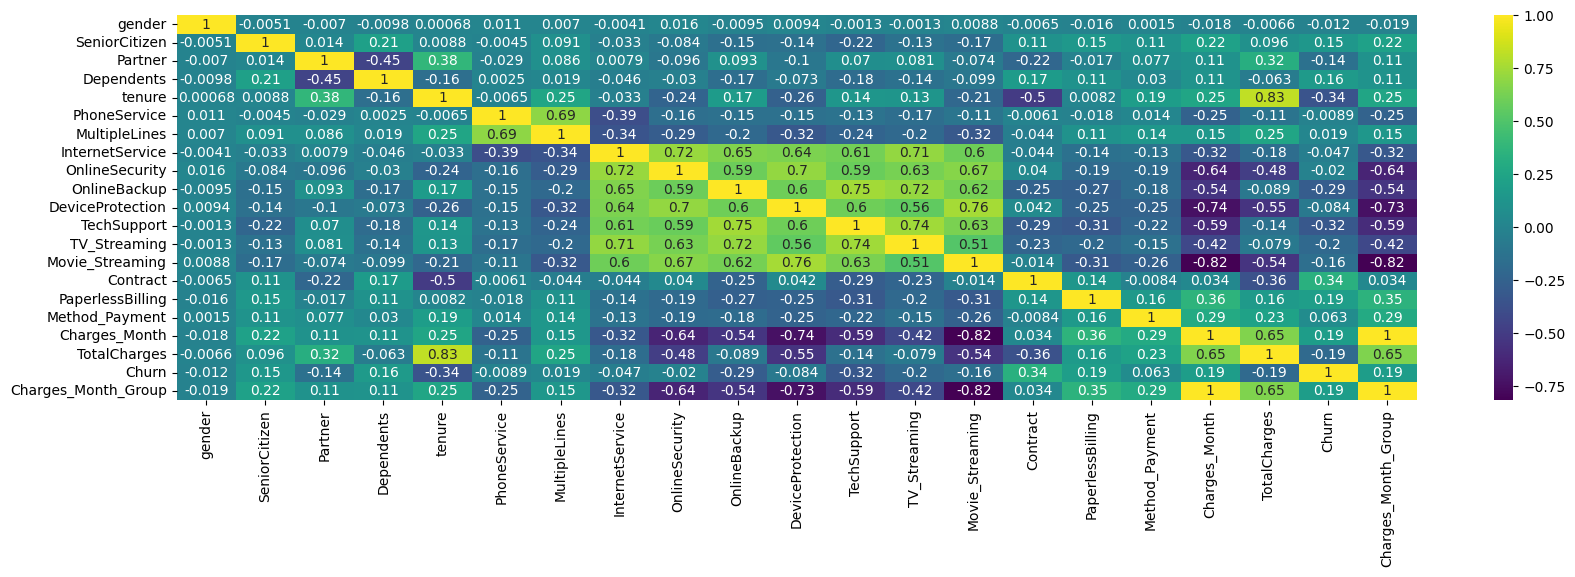

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# Assuming 'df' is your DataFrame

# Convert 'gender' column to numerical representation
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})  # Replace 'Female' with 0 and 'Male' with 1

# Identify columns with non-numeric values and convert them
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"Column '{col}' contains non-numeric values.")
        # Example conversion (adapt to your specific columns and values)
        unique_values = df[col].unique()
        mapping = {value: i for i, value in enumerate(unique_values)}
        df[col] = df[col].map(mapping)

# Now calculate correlations and plot the heatmap
plt.figure(figsize = (20,5))
sns.heatmap(df.corr(),cmap = 'viridis',annot = True); # Replace 'colors' with a valid colormap if needed

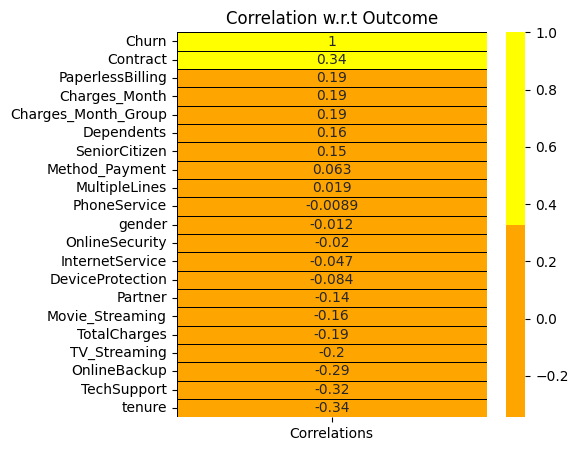

In [65]:
corr = df.corrwith(df['Churn']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t Outcome');

# Feature Selection

In [66]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df = df.copy(deep = True)
text_data_features = [i for i in list(df.columns) if i not in list(df.describe().columns)]

print('Label Encoder Transformation')
for i in text_data_features :
    df[i] = le.fit_transform(df[i])
    print(i,' : ',df[i].unique(),' = ',le.inverse_transform(df[i].unique()))

Label Encoder Transformation


In [67]:
df.head()

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0       0              0        0           0  0.291667             0   
1       0              0        0           1  0.750000             0   
2       1              0        1           1  0.013889             1   
3       1              0        0           1  0.055556             0   
4       1              0        0           0  0.000000             0   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  ...  \
0              0                0               0             0  ...   
1              1                1               1             1  ...   
2              2                0               1             0  ...   
3              0                1               1             0  ...   
4              1                0               0             1  ...   

   TechSupport  TV_Streaming  Movie_Streaming  Contract  PaperlessBilling  \
0            0             0                0         0                 0   
1            0             1                0         1                 1   
2            0             0                1         2                 1   
3            0             0                1         2                 1   
4            1             0                1         1                 1   

   Method_Payment  Charges_Month  TotalCharges  Churn  Charges_Month_Group  
0               0       0.464375      0.153924      0                   12  
1               1       0.786746      0.590624      0                   19  
2               2       0.051819      0.002700      1                    4  
3               2       0.517688      0.027398      1                   14  
4               1       0.434978      0.000000      0                   12  

[5 rows x 21 columns]

In [68]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,mutual_info_classif

In [69]:
df.loc[:,cat_cols]

gender  Partner  Dependents  PhoneService  MultipleLines  \
0          0        0           0             0              0   
1          0        0           1             0              1   
2          1        1           1             1              2   
3          1        0           1             0              0   
4          1        0           0             0              1   
...      ...      ...         ...           ...            ...   
5629       1        1           1             0              0   
5630       0        1           0             0              1   
5631       1        1           0             0              0   
5632       1        0           1             0              1   
5633       1        0           1             0              0   

      InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  \
0                   0               0             0                 0   
1                   1               1             1                 1   
2                   0               1             0                 1   
3                   1               1             0                 1   
4                   0               0             1                 1   
...               ...             ...           ...               ...   
5629                1               0             0                 1   
5630                0               0             1                 0   
5631                2               2             2                 2   
5632                1               1             0                 0   
5633                2               2             2                 2   

      TechSupport  TV_Streaming  Movie_Streaming  Contract  PaperlessBilling  \
0               0             0                0         0                 0   
1               0             1                0         1                 1   
2               0             0                1         2                 1   
3               0             0                1         2                 1   
4               1             0                1         1                 1   
...           ...           ...              ...       ...               ...   
5629            0             1                0         2                 1   
5630            1             1                0         1                 1   
5631            2             2                2         2                 1   
5632            0             1                0         2                 1   
5633            2             2                2         0                 0   

      Method_Payment  Churn  SeniorCitizen  
0                  0      0              0  
1                  1      0              0  
2                  2      1              0  
3                  2      1              0  
4                  1      0              0  
...              ...    ...            ...  
5629               2      1              0  
5630               3      0              0  
5631               2      0              0  
5632               2      1              1  
5633               3      0              0  

[5634 rows x 17 columns]

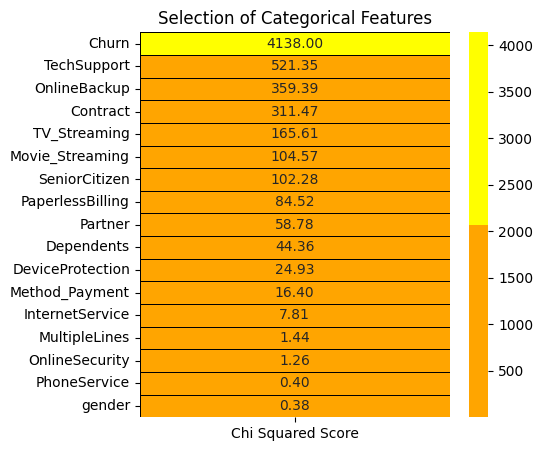

In [70]:
features = df.loc[:,cat_cols]
target = df.loc[:,'Churn']

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score'])

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

Feature Selection for Numerical Features :

In [71]:
from sklearn.feature_selection import f_classif

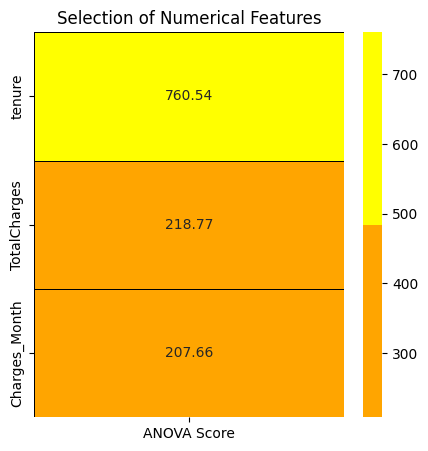

In [72]:
features = df.loc[:,num_cols]
target = df.loc[:,'Churn']

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score'])

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

In [74]:
df.drop(columns = ['PhoneService', 'gender','TV_Streaming','Movie_Streaming','MultipleLines','InternetService'],inplace = True)
df.head()

SeniorCitizen  Partner  Dependents    tenure  OnlineSecurity  OnlineBackup  \
0              0        0           0  0.291667               0             0   
1              0        0           1  0.750000               1             1   
2              0        1           1  0.013889               1             0   
3              0        0           1  0.055556               1             0   
4              0        0           0  0.000000               0             1   

   DeviceProtection  TechSupport  Contract  PaperlessBilling  Method_Payment  \
0                 0            0         0                 0               0   
1                 1            0         1                 1               1   
2                 1            0         2                 1               2   
3                 1            0         2                 1               2   
4                 1            1         1                 1               1   

   Charges_Month  TotalCharges  Churn  Charges_Month_Group  
0       0.464375      0.153924      0                   12  
1       0.786746      0.590624      0                   19  
2       0.051819      0.002700      1                    4  
3       0.517688      0.027398      1                   14  
4       0.434978      0.000000      0                   12

# Balancing

In [75]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [76]:
over = SMOTE(sampling_strategy = 1)

f1 = df.iloc[:,:13].values
t1 = df.iloc[:,13].values

f1, t1 = over.fit_resample(f1, t1)
Counter(t1)

Counter({0: 4138, 1: 4138})

# MODELING

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [78]:
x_train, x_test, y_train, y_test = train_test_split(f1, t1, test_size = 0.20, random_state = 2)

In [79]:
def model(classifier,x_train,y_train,x_test,y_test):

    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    plt.show()

def model_evaluation(classifier,x_test,y_test):

    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')

    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

# 1-) XGB Classifier

In [80]:
from xgboost import XGBClassifier

classifier_xgb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)

In [81]:
model(classifier_xgb,x_train,y_train,x_test,y_test)

Cross Validation Score :  89.40%
ROC_AUC Score :  81.14%


              precision    recall  f1-score   support

           0       0.84      0.77      0.80       824
           1       0.79      0.85      0.82       832

    accuracy                           0.81      1656
   macro avg       0.81      0.81      0.81      1656
weighted avg       0.81      0.81      0.81      1656



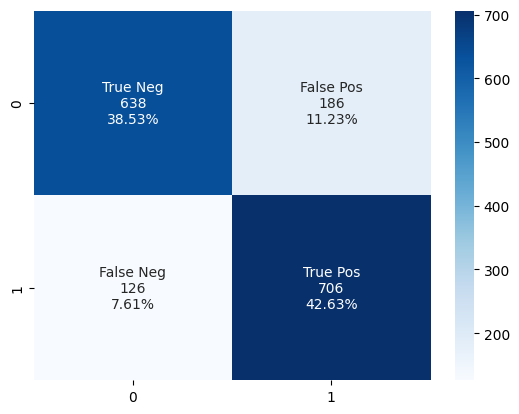

In [82]:
model_evaluation(classifier_xgb,x_test,y_test)

# 2) LGBM Classifier

In [83]:
from lightgbm import LGBMClassifier

classifier_lgbm = LGBMClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000, force_col_wise='true',verbose=-1)

In [84]:
model(classifier_lgbm,x_train,y_train,x_test,y_test)

Cross Validation Score :  89.67%
ROC_AUC Score :  81.45%


              precision    recall  f1-score   support

           0       0.84      0.78      0.81       824
           1       0.80      0.85      0.82       832

    accuracy                           0.81      1656
   macro avg       0.82      0.81      0.81      1656
weighted avg       0.82      0.81      0.81      1656



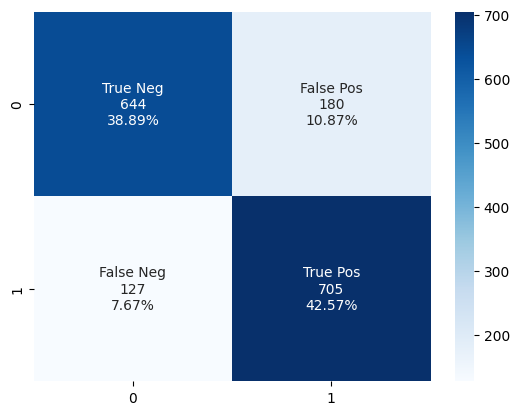

In [85]:
model_evaluation(classifier_lgbm,x_test,y_test)

# Random Forest Classifier

In [86]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)

In [87]:
model(classifier_rf,x_train,y_train,x_test,y_test)

Cross Validation Score :  85.07%
ROC_AUC Score :  75.76%


              precision    recall  f1-score   support

           0       0.78      0.71      0.74       824
           1       0.74      0.81      0.77       832

    accuracy                           0.76      1656
   macro avg       0.76      0.76      0.76      1656
weighted avg       0.76      0.76      0.76      1656



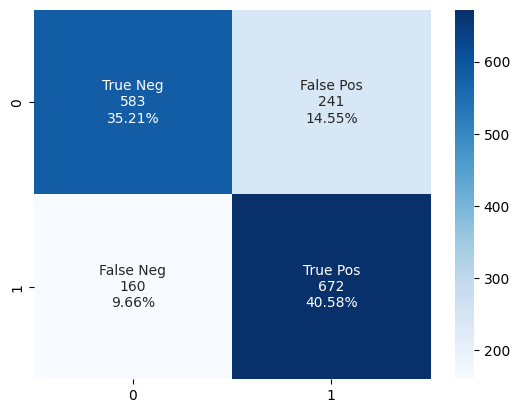

In [88]:
model_evaluation(classifier_rf,x_test,y_test)

# Decision Tree Classifier

In [89]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)

In [90]:
model(classifier_dt,x_train,y_train,x_test,y_test)

Cross Validation Score :  83.12%
ROC_AUC Score :  73.73%


              precision    recall  f1-score   support

           0       0.74      0.73      0.74       824
           1       0.74      0.74      0.74       832

    accuracy                           0.74      1656
   macro avg       0.74      0.74      0.74      1656
weighted avg       0.74      0.74      0.74      1656



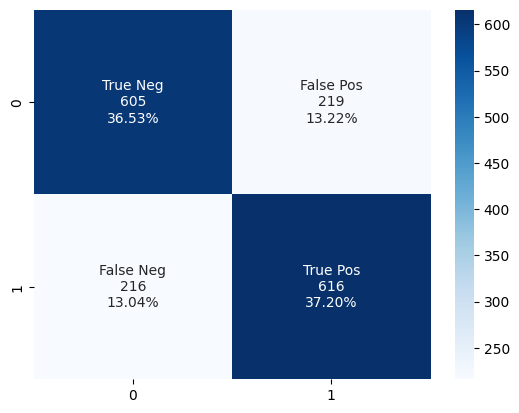

In [91]:
model_evaluation(classifier_dt,x_test,y_test)

# 5) Stack of XGBClassifier, LightGBMClassifier, Random Forest Classifer & Decision Tree Classifier

In [92]:
from sklearn.ensemble import StackingClassifier

stack = StackingClassifier(estimators = [('classifier_xgb',classifier_xgb),
                                         ('classifier_lgbm',classifier_lgbm),
                                         ('classifier_rf',classifier_rf),
                                         ('classifier_dt',classifier_dt)],
                           final_estimator = classifier_lgbm)

For stacking of classifiers, we stack the above 4 classifiers :

XGBClassifier
LightGBMClassifier
RandomForestClassifier
DecisionTreeClassifier It has an important hyperparameter known as final_estimator. It is the classifier that makes the final prediction by using the predicted classes by the various classifier and predicts the final output.

In [93]:
model(stack,x_train,y_train,x_test,y_test)

Cross Validation Score :  90.21%
ROC_AUC Score :  80.74%


              precision    recall  f1-score   support

           0       0.81      0.81      0.81       824
           1       0.81      0.81      0.81       832

    accuracy                           0.81      1656
   macro avg       0.81      0.81      0.81      1656
weighted avg       0.81      0.81      0.81      1656



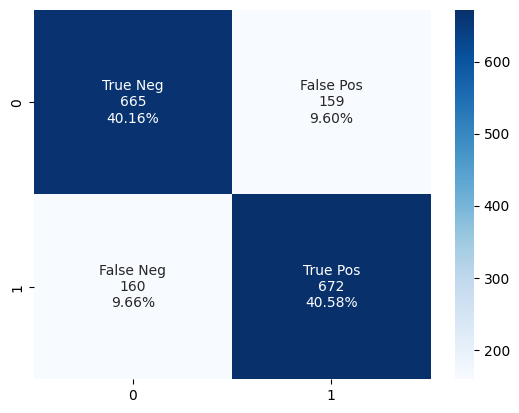

In [94]:
model_evaluation(stack,x_test,y_test)

Here's a summary of the key points:

Target Customer Segments:

Senior Citizens: Willing to pay higher monthly charges; require high-quality service.
Living with a Partner: Prefer services with monthly charges below 65.
Living Alone: Also prefer services with monthly charges below 65.
Focus on First 6 Months (Tenure 1st 6 Months):

Critical period for customers.
Focus on OnlineSecurity, OnlineBackup, DeviceProtection, and TechSupport to reduce churn between 40-50 months.
Support Services:

Establish robust support services.
Increase usage of MultipleLines and Fiber Optic for Telephone and Internet services.
Aim for average monthly charges of 100-120 for these services.
Streaming Services:

Make StreamingTV and StreamingMovies affordable.
Ensure ease of payment method.
Payment Methods:

Phase out Electronic Check.
Focus on Bank Transfer (automatic) and Credit Card (automatic).
Reduce average churn time for these methods to below 20 months.
Billing Options:

Paperless Billing starts at a high point of 60 in monthly charges.
Other options start cheaper, with paper billing starting at 20 in monthly charges.